<a href="https://colab.research.google.com/github/firstnapat/End_to_end_de_project_covid19_daily_dashboard/blob/main/02_Data_Cleansing_with_Spark.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 Data Cleansing with Spark

## ลิงค์ดีมีประโยชน์

### 1. หน้าเว็บไซต์รวมคำสั่งทั้งหมดของ PySpark

หน้าเว็บไซต์นี้อัพเดทข้อมูลโดยทีมงาน Apache Spark พร้อมวิธีใช้ และคำอธิบายค่าต่าง ๆ ที่คำสั่งนั้นสามารถรับได้ สามารถค้นหาคำสั่งที่ต้องการได้ด้วย

https://spark.apache.org/docs/latest/api/python/reference/index.html

### 2. [ภาษาอังกฤษ] Spark Cheatsheet by DataCamp 

รวมคำสั่ง Spark

**RDD:**
https://www.datacamp.com/community/blog/pyspark-cheat-sheet-python 

**DataFrame:**
https://www.datacamp.com/community/blog/pyspark-sql-cheat-sheet

### 3. [ภาษาไทย] Spark Cheatsheet by DataTH

รวมคำสั่ง Spark พร้อมตัวอย่างโค้ด และคำอธิบายภาษาไทย

https://blog.datath.com/cheatsheet-pyspark/


---


# Step 1) ติดตั้ง Spark และ PySpark

Google Colab เป็นเครื่องมือสำหรับรันคำสั่ง Python และ Bash บนคอมพิวเตอร์จำลองที่ Google เตรียมไว้ให้เรา

คอมพิวเตอร์จำลองนี้เรียกว่า Virtual Machine (VM)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!apt-get update                                                                          # อัพเดท Package ทั้งหมดใน VM ตัวนี้
!apt-get install openjdk-8-jdk-headless -qq > /dev/null                                  # ติดตั้ง Java Development Kit (จำเป็นสำหรับการติดตั้ง Spark)
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz # ติดตั้ง Spark 3.1.2
!tar xzvf spark-3.1.2-bin-hadoop2.7.tgz                                                  # Unzip ไฟล์ Spark 3.1.2
!pip install -q findspark==1.3.0                                                         # ติดตั้ง Package Python สำหรับเชื่อมต่อกับ Spark 

Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:9 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:14 http://security.ubuntu.c

In [ ]:
# Set enviroment variable ให้ Python รู้จัก Spark
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
# ติดตั้ง PySpark ลงใน Python
!pip install pyspark==3.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 212.4 MB 71 kB/s 
     |████████████████████████████████| 198 kB 49.3 MB/s 
  Created wheel for pyspark: filename=pyspark-3.1.2-py2.py3-none-any.whl size=212880769 sha256=99a1f120c36dbf63b71fdba56673503503577eccd3aa949660dcf1c3f322b510
  Stored in directory: /root/.cache/pip/wheels/a5/0a/c1/9561f6fecb759579a7d863dcd846daaa95f598744e71b02c77
Successfully built pyspark


## ใช้งาน Spark

In [ ]:
# Server ของ Google Colab มีกี่ Core
!cat /proc/cpuinfo

processor	: 0
vendor_id	: GenuineIntel
cpu family	: 6
model		: 79
model name	: Intel(R) Xeon(R) CPU @ 2.20GHz
stepping	: 0
microcode	: 0x1
cpu MHz		: 2200.140
cache size	: 56320 KB
physical id	: 0
siblings	: 2
core id		: 0
cpu cores	: 1
apicid		: 0
initial apicid	: 0
fpu		: yes
fpu_exception	: yes
cpuid level	: 13
wp		: yes
flags		: fpu vme de pse tsc msr pae mce cx8 apic sep mtrr pge mca cmov pat pse36 clflush mmx fxsr sse sse2 ss ht syscall nx pdpe1gb rdtscp lm constant_tsc rep_good nopl xtopology nonstop_tsc cpuid tsc_known_freq pni pclmulqdq ssse3 fma cx16 pcid sse4_1 sse4_2 x2apic movbe popcnt aes xsave avx f16c rdrand hypervisor lahf_lm abm 3dnowprefetch invpcid_single ssbd ibrs ibpb stibp fsgsbase tsc_adjust bmi1 hle avx2 smep bmi2 erms invpcid rtm rdseed adx smap xsaveopt arat md_clear arch_capabilities
bugs		: cpu_meltdown spectre_v1 spectre_v2 spec_store_bypass l1tf mds swapgs taa
bogomips	: 4400.28
clflush size	: 64
cache_alignment	: 64
address sizes	: 46 bits physical, 48 b

ใช้ `local[*]` เพื่อเปิดการใช้งานการประมวลผลแบบ multi-core (Spark จะใช้ CPU ทุก core ที่อนุญาตให้ใช้งานในเครื่อง)

In [ ]:
# เรียกใช้งานไลบรารี
# สร้าง Spark Session เพื่อใช้งาน Spark
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()  
# เอาทั้งหมดที่อยู่บน local เลย 
# getOrCreate() ถ้ามีอยู่แล้วก็เอามา ถ้าไม่มีก็สร้างขึ้นใหม่

In [ ]:
# ดูเวอร์ชั่น Python
import sys
sys.version_info

sys.version_info(major=3, minor=7, micro=13, releaselevel='final', serial=0)

In [ ]:
# ดูเวอร์ชั่น Spark
spark.version

'3.1.2'

## Load Data from Local Computer

คำอธิบายคำสั่ง:

wget = คำสั่งในการดาวน์โหลดไฟล์

wget -O = ตั้งชื่อไฟล์

### Load data ใส่ Spark

ใช้คำสั่ง `spark.read.csv` เพื่ออ่านข้อมูลจากไฟล์ CSV

Arguments:

Header = True << บอกให้ Spark รู้ว่าบรรทัดแรกในไฟล์ CSV เป็น Header

Inferschema = True << บอกให้ Spark พยายามเดาว่าแต่ละ column มี type เป็นอะไร [ ถ้าตั้งเป็น False, ทุก column จะถูกอ่านเป็น string (ตัวหนังสือ) ]

Reference: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrameReader.csv.html

In [ ]:
dt_cases_all = spark.read.csv('/content/drive/MyDrive/DataEngineerProject/cases_all_output.csv', header = True, inferSchema = True, )

In [ ]:
dt_by_procinces = spark.read.csv('/content/drive/MyDrive/DataEngineerProject/by_provincesoutput.csv', header = True, inferSchema = True, )

---

![](https://file.designil.com/2c6qGS+)

# Step 2) Data Profiling

Data Profiling เป็นการทำความเข้าใจข้อมูลเบื้องต้น เพื่อที่เราจะได้รู้ว่าข้อมูลนี้มีคอลัมน์ไหนบ้าง ค่าโดยรวมเป็นอย่างไรบ้าง ฯลฯ เพื่อให้เราตัดสินใจได้ต่อว่าจะเช็คที่จุดไหนต่อไป

ตัวอย่าง: max, min, average, sum, มี missing value มั้ย ฯลฯ

In [ ]:
# ดูว่ามีคอลัมน์อะไรบ้าง
dt_cases_all

DataFrame[txn_date: string, new_case: int, total_case: int, new_case_excludeabroad: int, total_case_excludeabroad: int, new_death: int, total_death: int, new_recovered: int, total_recovered: int, update_date: string]

> Columns:
1. txn_date
2. new_case
3. total_case
4. new_case_excludeabroad
5. total_case_excludeabroad
6. new_death
7. total_death
8. new_recovered
9. total_recovered
10. update_date

In [ ]:
# ดูข้อมูล
dt_cases_all.show()

+----------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|  txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|        update_date|
+----------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|2020-01-12|       1|         1|                     0|                       0|        0|          0|            0|              0|2022-06-30 07:26:58|
|2020-01-13|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-14|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-15|       0|         1|                     0|                       0|  

In [ ]:
# ดูข้อมูล 100 แถวแรก
dt_cases_all.show(100)

+----------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|  txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|        update_date|
+----------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|2020-01-12|       1|         1|                     0|                       0|        0|          0|            0|              0|2022-06-30 07:26:58|
|2020-01-13|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-14|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-15|       0|         1|                     0|                       0|  

In [ ]:
# ดูประเภทข้อมูลแต่ละคอลัมน์
dt_cases_all.dtypes

[('txn_date', 'string'),
 ('new_case', 'int'),
 ('total_case', 'int'),
 ('new_case_excludeabroad', 'int'),
 ('total_case_excludeabroad', 'int'),
 ('new_death', 'int'),
 ('total_death', 'int'),
 ('new_recovered', 'int'),
 ('total_recovered', 'int'),
 ('update_date', 'string')]

In [ ]:
# อีกคำสั่งในการดูข้อมูลแต่ละคอลัมน์ (Schema)
dt_cases_all.printSchema()

root
 |-- txn_date: string (nullable = true)
 |-- new_case: integer (nullable = true)
 |-- total_case: integer (nullable = true)
 |-- new_case_excludeabroad: integer (nullable = true)
 |-- total_case_excludeabroad: integer (nullable = true)
 |-- new_death: integer (nullable = true)
 |-- total_death: integer (nullable = true)
 |-- new_recovered: integer (nullable = true)
 |-- total_recovered: integer (nullable = true)
 |-- update_date: string (nullable = true)



nullable คือ ค่าสามารถเป็น null ได้
เป็น default ของ spark อยู่แล้วว่าข้อมูลที่โหลดเข้ามาสามารถเป็น null ได้





In [ ]:
# นับจำนวนแถวและ column
print((dt_cases_all.count(), len(dt_cases_all.columns)))

(965, 10)


In [ ]:
# สรุปข้อมูลสถิติ
dt_cases_all.describe().show()

+-------+----------+-----------------+------------------+----------------------+------------------------+------------------+------------------+-----------------+------------------+-------------------+
|summary|  txn_date|         new_case|        total_case|new_case_excludeabroad|total_case_excludeabroad|         new_death|       total_death|    new_recovered|   total_recovered|        update_date|
+-------+----------+-----------------+------------------+----------------------+------------------------+------------------+------------------+-----------------+------------------+-------------------+
|  count|       965|              965|               965|                   965|                     965|               965|               965|              965|               965|                965|
|   mean|      null|4823.802072538861|1254798.9367875648|     4797.819689119171|      1247195.2352331607| 33.52538860103627| 9737.944041450777|4773.233160621761| 1194863.681865285|               n

In [ ]:
# อีกคำสั่งในการสรุปข้อมูลสถิติ
# ReferenceL: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.summary.html

dt_cases_all.summary().show()

+-------+----------+-----------------+------------------+----------------------+------------------------+------------------+------------------+-----------------+------------------+-------------------+
|summary|  txn_date|         new_case|        total_case|new_case_excludeabroad|total_case_excludeabroad|         new_death|       total_death|    new_recovered|   total_recovered|        update_date|
+-------+----------+-----------------+------------------+----------------------+------------------------+------------------+------------------+-----------------+------------------+-------------------+
|  count|       965|              965|               965|                   965|                     965|               965|               965|              965|               965|                965|
|   mean|      null|4823.802072538861|1254798.9367875648|     4797.819689119171|      1247195.2352331607| 33.52538860103627| 9737.944041450777|4773.233160621761| 1194863.681865285|               n

In [ ]:
# สรุปข้อมูลสถิติเฉพาะ column ที่ระบุ
dt_cases_all.select(["new_death","new_recovered","total_case"]).describe().show()

+-------+------------------+-----------------+------------------+
|summary|         new_death|    new_recovered|        total_case|
+-------+------------------+-----------------+------------------+
|  count|               965|              965|               965|
|   mean| 33.52538860103627|4773.233160621761|1254798.9367875648|
| stddev|54.172027239602286| 7087.10296512745| 1661562.069434558|
|    min|                 0|                0|                 1|
|    max|               312|            28057|           4654969|
+-------+------------------+-----------------+------------------+



In [ ]:
dt_cases_all.select(["new_death","new_recovered","total_case"]).describe()

DataFrame[summary: string, new_death: string, new_recovered: string, total_case: string]

### Missing Value

คอลัมน์ไหนมี Missing Value บ้าง? และแสดงข้อมูลแถวที่มี Missing Value



In [ ]:
dt_cases_all.summary("count").show()

+-------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-----------+
|summary|txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|update_date|
+-------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-----------+
|  count|     965|     965|       965|                   965|                     965|      965|        965|          965|            965|        965|
+-------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-----------+



In [ ]:
# แสดงข้อมูลแถวที่มี Missing Value ให้ดูหน่อย
# dt.where( dt.user_id.isNull() ).show()

---

![](https://file.designil.com/D9H1d3+)

# Step 2) Data Profiling line_list_file

In [ ]:
# load line_list file
dt_line_list = spark.read.csv('/content/drive/MyDrive/DataEngineerProject/line_listoutput.csv', header = True, inferSchema = True, )

Data Profiling เป็นการทำความเข้าใจข้อมูลเบื้องต้น เพื่อที่เราจะได้รู้ว่าข้อมูลนี้มีคอลัมน์ไหนบ้าง ค่าโดยรวมเป็นอย่างไรบ้าง ฯลฯ เพื่อให้เราตัดสินใจได้ต่อว่าจะเช็คที่จุดไหนต่อไป

ตัวอย่าง: max, min, average, sum, มี missing value มั้ย ฯลฯ

In [ ]:
# ดูว่ามีคอลัมน์อะไรบ้าง
dt_line_list

DataFrame[txn_date: string, gender: string, age_number: int, age_range: string, nationality: string, job: string, risk: string, patient_type: string, province: string, update_date: string]

> Columns:
1. txn_date
2. gender
3. age_number
4. age_range
5. nationality
6. job
7. risk
8. patient_type
9. province
10. update_date

In [ ]:
# ดูข้อมูล
dt_line_list.show()

+----------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+
|  txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|     province|        update_date|
+----------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+
|2022-08-31|   ชาย|        42| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        57| 50-59 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        76| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        73| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        48| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|
|

In [ ]:
# ดูข้อมูล 100 แถวแรก
dt_line_list.show(100)

+----------+------+----------+---------+-----------+----+-----+------------+---------------+-------------------+
|  txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|       province|        update_date|
+----------+------+----------+---------+-----------+----+-----+------------+---------------+-------------------+
|2022-08-31|   ชาย|        42| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|         ชลบุรี|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        57| 50-59 ปี|       null|null|อื่นๆ|    10.อื่นๆ|      อุทัยธานี|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        76| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|      กาฬสินธุ์|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|         สกลนคร|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        73| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สุรินทร์|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        48| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|         สกลนคร|2022

In [ ]:
# ดูประเภทข้อมูลแต่ละคอลัมน์
dt_line_list.dtypes

[('txn_date', 'string'),
 ('gender', 'string'),
 ('age_number', 'int'),
 ('age_range', 'string'),
 ('nationality', 'string'),
 ('job', 'string'),
 ('risk', 'string'),
 ('patient_type', 'string'),
 ('province', 'string'),
 ('update_date', 'string')]

In [ ]:
# อีกคำสั่งในการดูข้อมูลแต่ละคอลัมน์ (Schema)
dt_line_list.printSchema()

root
 |-- txn_date: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age_number: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- job: string (nullable = true)
 |-- risk: string (nullable = true)
 |-- patient_type: string (nullable = true)
 |-- province: string (nullable = true)
 |-- update_date: string (nullable = true)



nullable คือ ค่าสามารถเป็น null ได้
เป็น default ของ spark อยู่แล้วว่าข้อมูลที่โหลดเข้ามาสามารถเป็น null ได้





In [ ]:
# นับจำนวนแถวและ column
print((dt_line_list.count(), len(dt_line_list.columns)))

(4969, 10)


In [ ]:
# สรุปข้อมูลสถิติ
dt_line_list.describe().show()

+-------+----------+-------+-----------------+---------+-----------+----+----------+--------------------+----------+-------------------+
|summary|  txn_date| gender|       age_number|age_range|nationality| job|      risk|        patient_type|  province|        update_date|
+-------+----------+-------+-----------------+---------+-----------+----+----------+--------------------+----------+-------------------+
|  count|      4969|   4969|             4796|     4969|       2063|   0|      4969|                4969|      4969|               4969|
|   mean|      null|   null|44.09049207673061|     null|       null|null|      null|                null|      null|               null|
| stddev|      null|   null|23.88904979247215|     null|       null|null|      null|                null|      null|               null|
|    min|2022-08-31|    ชาย|                1| 10-19 ปี|   American|null|Free to go|            10.อื่นๆ|    กระบี่|2022-08-31 07:26:44|
|    max|2022-09-02|ไม่ระบุ|             

In [ ]:
# อีกคำสั่งในการสรุปข้อมูลสถิติ
# ReferenceL: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.summary.html

dt_line_list.summary().show()

+-------+----------+-------+-----------------+---------+-----------+----+----------+--------------------+----------+-------------------+
|summary|  txn_date| gender|       age_number|age_range|nationality| job|      risk|        patient_type|  province|        update_date|
+-------+----------+-------+-----------------+---------+-----------+----+----------+--------------------+----------+-------------------+
|  count|      4969|   4969|             4796|     4969|       2063|   0|      4969|                4969|      4969|               4969|
|   mean|      null|   null|44.09049207673061|     null|       null|null|      null|                null|      null|               null|
| stddev|      null|   null|23.88904979247215|     null|       null|null|      null|                null|      null|               null|
|    min|2022-08-31|    ชาย|                1| 10-19 ปี|   American|null|Free to go|            10.อื่นๆ|    กระบี่|2022-08-31 07:26:44|
|    25%|      null|   null|             

In [ ]:
# สรุปข้อมูลสถิติเฉพาะ column ที่ระบุ
dt_line_list.select("age_number").describe().show()

+-------+-----------------+
|summary|       age_number|
+-------+-----------------+
|  count|             4796|
|   mean|44.09049207673061|
| stddev|23.88904979247215|
|    min|                1|
|    max|              103|
+-------+-----------------+



In [ ]:
dt_line_list.select("age_range").describe()

DataFrame[summary: string, age_range: string]

### Missing Value

คอลัมน์ไหนมี Missing Value บ้าง? และแสดงข้อมูลแถวที่มี Missing Value



In [ ]:
dt_line_list.summary("count").show()

+-------+--------+------+----------+---------+-----------+---+----+------------+--------+-----------+
|summary|txn_date|gender|age_number|age_range|nationality|job|risk|patient_type|province|update_date|
+-------+--------+------+----------+---------+-----------+---+----+------------+--------+-----------+
|  count|    4969|  4969|      4796|     4969|       2063|  0|4969|        4969|    4969|       4969|
+-------+--------+------+----------+---------+-----------+---+----+------------+--------+-----------+



In [ ]:
# แสดงข้อมูลแถวที่มี Missing Value ให้ดูหน่อย
dt_line_list.where( dt_line_list.age_number.isNull() ).show()

+----------+------+----------+---------+-----------+----+-----+------------+---------------+-------------------+
|  txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|       province|        update_date|
+----------+------+----------+---------+-----------+----+-----+------------+---------------+-------------------+
|2022-08-31|   ชาย|      null|  ไม่ระบุ|       null|null|อื่นๆ|    10.อื่นๆ|        สุโขทัย|2022-08-31 07:26:44|
|2022-08-31|  หญิง|      null|  ไม่ระบุ|       null|null|อื่นๆ|    10.อื่นๆ|ประจวบคีรีขันธ์|2022-08-31 07:26:44|
|2022-08-31|  หญิง|      null|  ไม่ระบุ|       null|null|อื่นๆ|    10.อื่นๆ|      สมุทรสาคร|2022-08-31 07:26:44|
|2022-08-31|   ชาย|      null|  ไม่ระบุ|       null|null|อื่นๆ|    10.อื่นๆ|      กาญจนบุรี|2022-08-31 07:26:44|
|2022-08-31|   ชาย|      null|  ไม่ระบุ|       null|null|อื่นๆ|    10.อื่นๆ|       สุรินทร์|2022-08-31 07:26:44|
|2022-08-31|  หญิง|      null|  ไม่ระบุ|       null|null|อื่นๆ|    10.อื่นๆ|       สุรินทร์|2022

In [ ]:
dt_line_list.where( dt_line_list.nationality.isNull() ).show()

+----------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+
|  txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|     province|        update_date|
+----------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+
|2022-08-31|   ชาย|        42| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        57| 50-59 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        76| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        73| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        48| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|
|

In [ ]:
dt_line_list.where( dt_line_list.job.isNull() ).show()

+----------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+
|  txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|     province|        update_date|
+----------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+
|2022-08-31|   ชาย|        42| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        57| 50-59 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        76| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        73| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        48| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|
|

---

![](https://file.designil.com/D9H1d3+)

# Step 2) Data Profiling by_provinces

In [ ]:
# load line_list file
dt_by_provinces = spark.read.csv('/content/drive/MyDrive/DataEngineerProject/by_provincesoutput.csv', header = True, inferSchema = True, )

Data Profiling เป็นการทำความเข้าใจข้อมูลเบื้องต้น เพื่อที่เราจะได้รู้ว่าข้อมูลนี้มีคอลัมน์ไหนบ้าง ค่าโดยรวมเป็นอย่างไรบ้าง ฯลฯ เพื่อให้เราตัดสินใจได้ต่อว่าจะเช็คที่จุดไหนต่อไป

ตัวอย่าง: max, min, average, sum, มี missing value มั้ย ฯลฯ

In [ ]:
# ดูว่ามีคอลัมน์อะไรบ้าง
dt_by_provinces

DataFrame[txn_date: string, province: string, new_case: int, total_case: int, new_case_excludeabroad: int, total_case_excludeabroad: int, new_death: int, total_death: int, update_date: string]

> Columns:
1. txn_date
2. province
3. new_case
4. total_case
5. new_case_excludeabroad
6. total_case_excludeabroad
7. new_death
8. total_death
9. update_date

In [ ]:
# ดูข้อมูล
dt_by_provinces.show()

+----------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|  txn_date|     province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+----------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2020-01-12|       กระบี่|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|กรุงเทพมหานคร|       1|         1|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|    กาญจนบุรี|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|    กาฬสินธุ์|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|    กำแพงเพชร|       0|      

In [ ]:
# ดูข้อมูล 100 แถวแรก
dt_by_provinces.show(100)

+----------+---------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|  txn_date|       province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+----------+---------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2020-01-12|         กระบี่|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|  กรุงเทพมหานคร|       1|         1|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|      กาญจนบุรี|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|      กาฬสินธุ์|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|      กำแพงเพชร

In [ ]:
# ดูประเภทข้อมูลแต่ละคอลัมน์
dt_by_provinces.dtypes

[('txn_date', 'string'),
 ('province', 'string'),
 ('new_case', 'int'),
 ('total_case', 'int'),
 ('new_case_excludeabroad', 'int'),
 ('total_case_excludeabroad', 'int'),
 ('new_death', 'int'),
 ('total_death', 'int'),
 ('update_date', 'string')]

In [ ]:
# อีกคำสั่งในการดูข้อมูลแต่ละคอลัมน์ (Schema)
dt_by_provinces.printSchema()

root
 |-- txn_date: string (nullable = true)
 |-- province: string (nullable = true)
 |-- new_case: integer (nullable = true)
 |-- total_case: integer (nullable = true)
 |-- new_case_excludeabroad: integer (nullable = true)
 |-- total_case_excludeabroad: integer (nullable = true)
 |-- new_death: integer (nullable = true)
 |-- total_death: integer (nullable = true)
 |-- update_date: string (nullable = true)



nullable คือ ค่าสามารถเป็น null ได้
เป็น default ของ spark อยู่แล้วว่าข้อมูลที่โหลดเข้ามาสามารถเป็น null ได้





In [ ]:
# นับจำนวนแถวและ column
print((dt_by_provinces.count(), len(dt_by_provinces.columns)))

(75270, 9)


In [ ]:
# สรุปข้อมูลสถิติ
dt_by_provinces.describe().show()

+-------+----------+--------+------------------+------------------+----------------------+------------------------+-------------------+------------------+-------------------+
|summary|  txn_date|province|          new_case|        total_case|new_case_excludeabroad|total_case_excludeabroad|          new_death|       total_death|        update_date|
+-------+----------+--------+------------------+------------------+----------------------+------------------------+-------------------+------------------+-------------------+
|  count|     75270|   75270|             75270|             75270|                 75270|                   75270|              75270|             75270|              75270|
|   mean|      null|    null| 61.84361631460077|16087.165856250831|     61.51050883486116|      15989.682502989239|0.42981267437225984|124.84543642885612|               null|
| stddev|      null|    null|218.76465531372878| 53288.73494572976|    218.12999744864044|      53005.304847781605|  2.531930

In [ ]:
# อีกคำสั่งในการสรุปข้อมูลสถิติ
# ReferenceL: https://spark.apache.org/docs/latest/api/python/reference/api/pyspark.sql.DataFrame.summary.html

dt_by_provinces.summary().show()

+-------+----------+--------+------------------+------------------+----------------------+------------------------+-------------------+------------------+-------------------+
|summary|  txn_date|province|          new_case|        total_case|new_case_excludeabroad|total_case_excludeabroad|          new_death|       total_death|        update_date|
+-------+----------+--------+------------------+------------------+----------------------+------------------------+-------------------+------------------+-------------------+
|  count|     75270|   75270|             75270|             75270|                 75270|                   75270|              75270|             75270|              75270|
|   mean|      null|    null| 61.84361631460077|16087.165856250831|     61.51050883486116|      15989.682502989239|0.42981267437225984|124.84543642885612|               null|
| stddev|      null|    null|218.76465531372878| 53288.73494572976|    218.12999744864044|      53005.304847781605|  2.531930

In [ ]:
# สรุปข้อมูลสถิติเฉพาะ column ที่ระบุ
dt_by_provinces.select("new_case").describe().show()

+-------+------------------+
|summary|          new_case|
+-------+------------------+
|  count|             75270|
|   mean| 61.84361631460077|
| stddev|218.76465531372878|
|    min|                 0|
|    max|              5161|
+-------+------------------+



In [ ]:
dt_by_provinces.select("new_case").describe()

DataFrame[summary: string, new_case: string]

### Missing Value

คอลัมน์ไหนมี Missing Value บ้าง? และแสดงข้อมูลแถวที่มี Missing Value



In [ ]:
dt_by_provinces.summary("count").show()

+-------+--------+--------+--------+----------+----------------------+------------------------+---------+-----------+-----------+
|summary|txn_date|province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|update_date|
+-------+--------+--------+--------+----------+----------------------+------------------------+---------+-----------+-----------+
|  count|   75270|   75270|   75270|     75270|                 75270|                   75270|    75270|      75270|      75270|
+-------+--------+--------+--------+----------+----------------------+------------------------+---------+-----------+-----------+



---

![](https://file.designil.com/D9H1d3+)

# Step 3) EDA - Exploratory Data Analysis

## Non-Graphical EDA

เราสามารถใช้คำสั่ง Spark ในการค้นหาข้อมูลที่ต้องการได้

หาจำนวนวันที่ไม่มีเคสคนตายเกิดขึ้น

In [ ]:
# ข้อมูลที่เป็นตัวเลข
dt_cases_all.where(dt_cases_all.new_death <= 0).count()

397

In [ ]:
# ข้อมูลที่เป็นตัวหนังสือ
# dt_cases_all.where(dt_cases_all.country == 'Canada').show()

### Exercise 2: 
1. การซื้อทั้งหมดที่เกิดขึ้นในเดือนเมษายน มีกี่แถว
2. การซื้อทั้งหมดที่เกิดขึ้นในเดือนสิงหาคม มีกี่แถว

In [ ]:
# Answer here
# dt.where((dt.price >= 1) & (dt.timestamp.startswith('2021-04'))).count()

In [ ]:
# dt.where((dt.price >= 1) & (dt.timestamp.startswith('2021-08'))).count()

In [ ]:
# เฉลย
# dt.where(dt.timestamp.startswith('2021-04')).count()

## Graphical EDA


Spark ไม่ได้ถูกพัฒนามาเพื่องาน plot ข้อมูล เพราะฉะนั้นเราจะใช้ package `seaborn` `matplotlib` และ `pandas` ในการ plot ข้อมูลแทน

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# แปลง Spark Dataframe เป็น Pandas Dataframe - ใช้เวลาประมาณ 6 วินาที
dt_pd_cases_all = dt_cases_all.toPandas()

In [ ]:
# ดูตัวอย่างข้อมูล
dt_pd_cases_all.head()

,txn_date,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,new_recovered,total_recovered,update_date
0,2020-01-12,1,1,0,0,0,0,0,0,2022-06-30 07:26:58
1,2020-01-13,0,1,0,0,0,0,0,0,2022-06-29 18:09:36
2,2020-01-14,0,1,0,0,0,0,0,0,2022-06-29 18:09:36
3,2020-01-15,0,1,0,0,0,0,0,0,2022-06-29 18:09:36
4,2020-01-16,0,1,0,0,0,0,0,0,2022-06-29 18:09:36


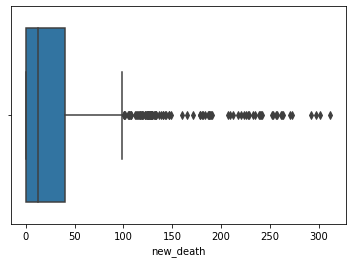

In [ ]:
# Boxplot - แสดงการกระจายตัวของข้อมูลตัวเลข
sns.boxplot(x = dt_pd_cases_all['new_death'])

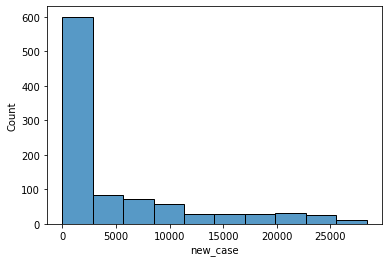

In [ ]:
# Histogram - แสดงการกระจายตัวของข้อมูลตัวเลข
# bins = จำนวน bar ที่ต้องการแสดง
sns.histplot(dt_pd_cases_all['new_case'], bins=10)

### Exercise 3: 
คนติดเชื้อ เพิ่มขึ้นสัมพันธ์กับคนหายป่วยหรือเปล่า?

ลองสร้าง Plot เพื่อดูความสัมพันธ์ระหว่าง new_case กับ new_recovered

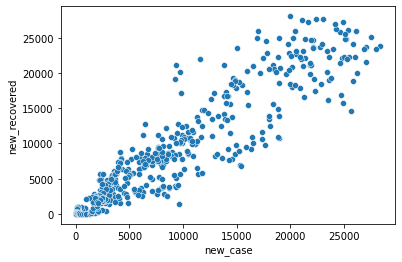

In [ ]:
# Answer here
sns.scatterplot(data=dt_pd_cases_all, x="new_case", y="new_recovered")
# sns.scatterplot(x=dt_pd.book, y=dt_pd.price)

#### Bonus: สร้าง interactive chart

In [ ]:
# Plotly - interactive chart
import plotly.express as px
fig = px.scatter(dt_pd_cases_all, 'new_case', 'new_recovered')
fig.show()

---

![](https://file.designil.com/Huzkx0+)

# Step 3) EDA - Exploratory Data Analysis line_list

## Non-Graphical EDA

เราสามารถใช้คำสั่ง Spark ในการค้นหาข้อมูลที่ต้องการได้

หาจำนวนวันที่ไม่มีเคสคนตายเกิดขึ้น

In [ ]:
# ข้อมูลที่เป็นตัวเลข จำนวนผู้สูงอายุที่อายุมากกว่า 70 ปี ที่ติดเชื้อ
dt_line_list.where(dt_line_list.age_range == '>= 70 ปี').count()

843

In [ ]:
# จำนวนเด็กอายุน้อยกว่า 10 ปี ที่ติดเชื้อ
dt_line_list.where(dt_line_list.age_range == '< 10 ปี').count()

478

In [ ]:
# ข้อมูลที่เป็นตัวหนังสือ
dt_line_list.where(dt_line_list.province == 'ขอนแก่น').show()

+----------+------+----------+---------+-----------+----+-----+------------+--------+-------------------+
|  txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|province|        update_date|
+----------+------+----------+---------+-----------+----+-----+------------+--------+-------------------+
|2022-08-31|  หญิง|        24| 20-29 ปี|       null|null|อื่นๆ|    10.อื่นๆ| ขอนแก่น|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        17| 10-19 ปี|       null|null|อื่นๆ|    10.อื่นๆ| ขอนแก่น|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        86| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ| ขอนแก่น|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        90| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ| ขอนแก่น|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        26| 20-29 ปี|       null|null|อื่นๆ|    10.อื่นๆ| ขอนแก่น|2022-08-31 07:26:44|
|2022-08-31|   ชาย|        32| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ| ขอนแก่น|2022-08-31 07:26:44|
|2022-08-31|  หญิง|        45| 40-49 ปี|      

In [ ]:
dt_line_list.where(dt_line_list.province == 'ขอนแก่น').count()

112

## Graphical EDA


Spark ไม่ได้ถูกพัฒนามาเพื่องาน plot ข้อมูล เพราะฉะนั้นเราจะใช้ package `seaborn` `matplotlib` และ `pandas` ในการ plot ข้อมูลแทน

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from pyspark.sql.functions import expr

In [ ]:
dt_line_list.select("gender").distinct().show()

+-------+
| gender|
+-------+
|   หญิง|
|ไม่ระบุ|
|    ชาย|
+-------+



In [ ]:
dt_line_list = dt_line_list.withColumn("new_gender",
    expr("case when gender = 'ชาย' then 'Male' " +
                   "when gender = 'หญิง' then 'Female' " +
                   "else 'Unknown' end"))

In [ ]:
type(dt_line_list)

pyspark.sql.dataframe.DataFrame

In [ ]:
# แปลง Spark Dataframe เป็น Pandas Dataframe - ใช้เวลาประมาณ 6 วินาที
dt_pd_line_list = dt_line_list.toPandas()

In [ ]:
# ดูตัวอย่างข้อมูล
dt_pd_line_list.head()

,txn_date,gender,age_number,age_range,nationality,job,risk,patient_type,province,update_date,new_gender
0,2022-08-31,ชาย,42.0,40-49 ปี,None,None,อื่นๆ,10.อื่นๆ,ชลบุรี,2022-08-31 07:26:44,Male
1,2022-08-31,หญิง,57.0,50-59 ปี,None,None,อื่นๆ,10.อื่นๆ,อุทัยธานี,2022-08-31 07:26:44,Female
2,2022-08-31,หญิง,76.0,>= 70 ปี,None,None,อื่นๆ,10.อื่นๆ,กาฬสินธุ์,2022-08-31 07:26:44,Female
3,2022-08-31,หญิง,39.0,30-39 ปี,None,None,อื่นๆ,10.อื่นๆ,สกลนคร,2022-08-31 07:26:44,Female
4,2022-08-31,ชาย,73.0,>= 70 ปี,None,None,อื่นๆ,10.อื่นๆ,สุรินทร์,2022-08-31 07:26:44,Male


In [ ]:
dt_pd_line_list.query('age_number==1')

,txn_date,gender,age_number,age_range,nationality,job,risk,patient_type,province,update_date,new_gender
96,2022-08-31,หญิง,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,กรุงเทพมหานคร,2022-08-31 07:26:44,Female
116,2022-08-31,หญิง,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,สมุทรสาคร,2022-08-31 07:26:44,Female
177,2022-08-31,หญิง,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,สระบุรี,2022-08-31 07:26:44,Female
186,2022-08-31,ชาย,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,ลพบุรี,2022-08-31 07:26:44,Male
195,2022-08-31,หญิง,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,กรุงเทพมหานคร,2022-08-31 07:26:44,Female
...,...,...,...,...,...,...,...,...,...,...,...
4571,2022-09-02,ชาย,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,สุรินทร์,2022-09-02 07:25:47,Male
4607,2022-09-02,ชาย,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,เชียงราย,2022-09-02 07:25:47,Male
4650,2022-09-02,หญิง,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,สมุทรสาคร,2022-09-02 07:25:47,Female
4829,2022-09-02,หญิง,1.0,< 10 ปี,None,None,อื่นๆ,10.อื่นๆ,ลำพูน,2022-09-02 07:25:47,Female


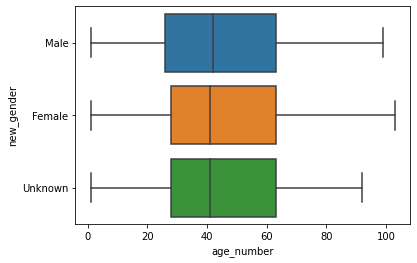

In [ ]:
# Boxplot - แสดงการกระจายตัวของข้อมูลตัวเลข
sns.boxplot(x = dt_pd_line_list['age_number'], y = dt_pd_line_list['new_gender'])

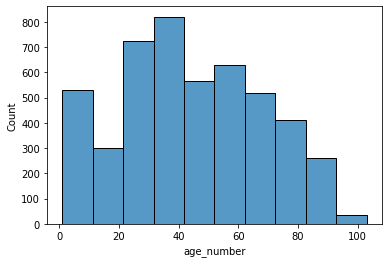

In [ ]:
# bins = จำนวน bar ที่ต้องการแสดง
sns.histplot(dt_pd_line_list['age_number'], bins=10)

### Exercise 3: 
คนติดเชื้อ เพิ่มขึ้นสัมพันธ์กับคนหายหรือเปล่า?

ลองสร้าง Plot เพื่อดูความสัมพันธ์ระหว่าง new_case กับ new_recovered

In [ ]:
# Answer here
# sns.scatterplot(data=dt_pd_line_list, x="age_number", y="new_recovered")

# Step 3) EDA - Exploratory Data Analysis by_provinces

## Non-Graphical EDA

เราสามารถใช้คำสั่ง Spark ในการค้นหาข้อมูลที่ต้องการได้

หาจำนวนวันที่ไม่มีเคสคนตายเกิดขึ้น

In [ ]:
# ข้อมูลที่เป็นตัวเลข
dt_by_provinces.where(dt_by_provinces.new_death <= 0).count()

63714

In [ ]:
# ข้อมูลที่เป็นตัวหนังสือ
dt_by_provinces.where(dt_by_provinces.province == 'ร้อยเอ็ด').show()

+----------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|  txn_date|province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+----------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2020-01-12|ร้อยเอ็ด|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-13|ร้อยเอ็ด|       0|         0|                     0|                       0|        0|          0|2022-06-29 18:09:36|
|2020-01-14|ร้อยเอ็ด|       0|         0|                     0|                       0|        0|          0|2022-06-29 18:09:36|
|2020-01-15|ร้อยเอ็ด|       0|         0|                     0|                       0|        0|          0|2022-06-29 18:09:36|
|2020-01-16|ร้อยเอ็ด|       0|         0|                     0|            

### Exercise 2: 
1. ผู้ติดเชื้อแบ่งตามรายจังหวัดร้อยเอ็ดที่เกิดขึ้นในเดือนกันยายน มีกี่แถว แสดงข้อมูลออกมา
2. ผู้ติดเชื้อแบ่งตามรายจังหวัดชลบุรีที่เกิดขึ้นในเดือนกันยายน มีกี่แถว แสดงข้อมูลออกมา

In [ ]:
# Answer here
dt_by_provinces.where((dt_by_provinces.province == 'ร้อยเอ็ด') & (dt_by_provinces.txn_date.startswith('2022-09'))).count()

2

In [ ]:
# Answer here
dt_by_provinces.where((dt_by_provinces.province == 'ร้อยเอ็ด') & (dt_by_provinces.txn_date.startswith('2022-09'))).show()

+----------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|  txn_date|province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+----------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2022-09-01|ร้อยเอ็ด|       8|     55982|                     8|                   55978|        0|        356|2022-09-01 07:26:13|
|2022-09-02|ร้อยเอ็ด|       3|     55985|                     3|                   55981|        0|        356|2022-09-02 07:25:47|
+----------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+



In [ ]:
# Answer here
dt_by_provinces.where((dt_by_provinces.province == 'ชลบุรี') & (dt_by_provinces.txn_date.startswith('2022-09'))).count()

2

In [ ]:
# Answer here
dt_by_provinces.where((dt_by_provinces.province == 'ชลบุรี') & (dt_by_provinces.txn_date.startswith('2022-09'))).show()

+----------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|  txn_date|province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+----------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2022-09-01|  ชลบุรี|      74|    233960|                    73|                  230956|        1|       1252|2022-09-01 07:26:13|
|2022-09-02|  ชลบุรี|      36|    233996|                    36|                  230992|        2|       1254|2022-09-02 07:25:47|
+----------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+



## Graphical EDA


Spark ไม่ได้ถูกพัฒนามาเพื่องาน plot ข้อมูล เพราะฉะนั้นเราจะใช้ package `seaborn` `matplotlib` และ `pandas` ในการ plot ข้อมูลแทน

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# แปลง Spark Dataframe เป็น Pandas Dataframe - ใช้เวลาประมาณ 6 วินาที
dt_pd_by_provinces = dt_by_provinces.toPandas()

In [ ]:
# ดูตัวอย่างข้อมูล
dt_pd_by_provinces.head()

,txn_date,province,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_death,total_death,update_date
0,2020-01-12,กระบี่,0,0,0,0,0,0,2022-06-30 07:26:58
1,2020-01-12,กรุงเทพมหานคร,1,1,0,0,0,0,2022-06-30 07:26:58
2,2020-01-12,กาญจนบุรี,0,0,0,0,0,0,2022-06-30 07:26:58
3,2020-01-12,กาฬสินธุ์,0,0,0,0,0,0,2022-06-30 07:26:58
4,2020-01-12,กำแพงเพชร,0,0,0,0,0,0,2022-06-30 07:26:58


In [ ]:
dt_pd_by_provinces.dtypes

txn_date                    object
province                    object
new_case                     int32
total_case                   int32
new_case_excludeabroad       int32
total_case_excludeabroad     int32
new_death                    int32
total_death                  int32
update_date                 object
dtype: object

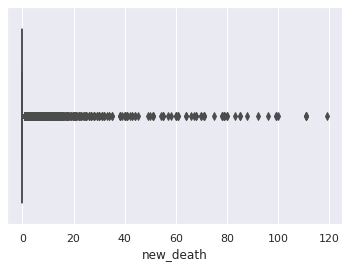

In [ ]:
# Boxplot - แสดงการกระจายตัวของข้อมูลตัวเลข
sns.set(style="darkgrid")
sns.boxplot(x = dt_pd_by_provinces['new_death'])

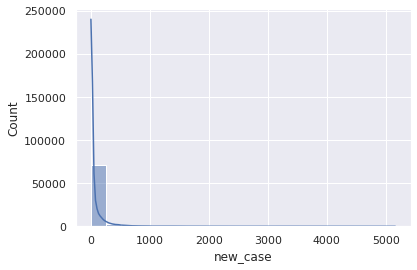

In [ ]:
# Histogram - แสดงการกระจายตัวของข้อมูลตัวเลข
# bins = จำนวน bar ที่ต้องการแสดง
sns.set(style="darkgrid")
sns.histplot(data=dt_pd_by_provinces, x="new_case", kde=True, bins=20)

In [ ]:
dt_pd_by_provinces.dtypes

txn_date                    datetime64[ns]
province                            object
new_case                             int32
total_case                           int32
new_case_excludeabroad               int32
total_case_excludeabroad             int32
new_death                            int32
total_death                          int32
update_date                         object
dtype: object

### Exercise 3: 
คนติดเชื้อ เพิ่มขึ้นสัมพันธ์กับคนที่เสียชีวิตหรือเปล่า?

ลองสร้าง Plot เพื่อดูความสัมพันธ์ระหว่าง new_case กับ new_death

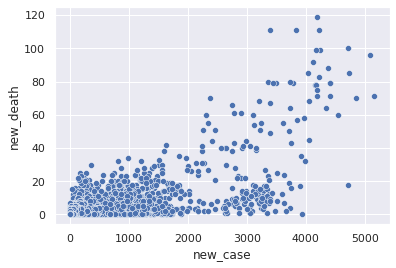

In [ ]:
# Answer here
sns.set(style="darkgrid")
sns.scatterplot(data=dt_pd_by_provinces, x="new_case", y="new_death")

#### Bonus: สร้าง interactive chart

In [ ]:
# Plotly - interactive chart
import plotly.express as px
fig = px.scatter(dt_pd_by_provinces, 'new_case', 'new_death')
fig.show()

---

![](https://file.designil.com/Huzkx0+)

# Step 4) Data Cleansing with Spark

มาทำความสะอาดข้อมูลด้วย Spark กันเถอะ

### แปลง Data Type

ปัญหาที่เจอบ่อยที่สุดแบบหนึ่งในข้อมูล คือ **Data Type ไม่ตรงกับที่เราต้องการ**

In [ ]:
# Show top 5 rows
dt_cases_all.show(5)

+----------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|  txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|        update_date|
+----------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|2020-01-12|       1|         1|                     0|                       0|        0|          0|            0|              0|2022-06-30 07:26:58|
|2020-01-13|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-14|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-15|       0|         1|                     0|                       0|  

In [ ]:
# Show Schema
dt_cases_all.printSchema()

root
 |-- txn_date: string (nullable = true)
 |-- new_case: integer (nullable = true)
 |-- total_case: integer (nullable = true)
 |-- new_case_excludeabroad: integer (nullable = true)
 |-- total_case_excludeabroad: integer (nullable = true)
 |-- new_death: integer (nullable = true)
 |-- total_death: integer (nullable = true)
 |-- new_recovered: integer (nullable = true)
 |-- total_recovered: integer (nullable = true)
 |-- update_date: string (nullable = true)



จะเห็นว่า `Timestamp` ถูกอ่านเป็นข้อมูลตัวหนังสือ (String) แต่เราอยากให้มันเป็นข้อมูลวันที่และเวลา (date time) จะทำยังไงดี?

ก่อนอื่น เราต้องมาดูก่อนว่าคอลัมน์ Timestamp แสดงเลขวันที่ก่อน หรือเลขเดือนก่อน (DD/MM/YYYY หรือ MM/DD/YYYY)

In [ ]:
dt_cases_all.select(["txn_date","update_date"]).show(10)

+----------+-------------------+
|  txn_date|        update_date|
+----------+-------------------+
|2020-01-12|2022-06-30 07:26:58|
|2020-01-13|2022-06-29 18:09:36|
|2020-01-14|2022-06-29 18:09:36|
|2020-01-15|2022-06-29 18:09:36|
|2020-01-16|2022-06-29 18:09:36|
|2020-01-17|2022-06-30 07:26:58|
|2020-01-18|2022-06-29 18:09:36|
|2020-01-19|2022-06-29 18:09:36|
|2020-01-20|2022-06-29 18:09:36|
|2020-01-21|2022-06-29 18:09:36|
+----------+-------------------+
only showing top 10 rows



เราจะมาใช้ฟังก์ชั่น to_timestamp ซึ่งอยู่ใน pyspark.sql.functions กัน

Reference: https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.to_timestamp.html

In [ ]:
# แปลง string เป็น datetime
from pyspark.sql import functions as f
# withcolumn เป็นการสร้างคอลัมน์ใหม่ชื่อ timestamp
dt_cases_allclean = dt_cases_all.withColumn("txn_date",
                        f.to_timestamp(dt_cases_all.txn_date, 'yyyy-MM-dd'))\
                        .withColumn("update_date",
                        f.to_timestamp(dt_cases_all.update_date, 'yyyy-MM-dd HH:mm:ss')
                        )

dt_cases_allclean.show()

+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|           txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|        update_date|
+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|2020-01-12 00:00:00|       1|         1|                     0|                       0|        0|          0|            0|              0|2022-06-30 07:26:58|
|2020-01-13 00:00:00|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-14 00:00:00|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-15 00:00:00|       

In [ ]:
dt_cases_allclean.printSchema()

root
 |-- txn_date: timestamp (nullable = true)
 |-- new_case: integer (nullable = true)
 |-- total_case: integer (nullable = true)
 |-- new_case_excludeabroad: integer (nullable = true)
 |-- total_case_excludeabroad: integer (nullable = true)
 |-- new_death: integer (nullable = true)
 |-- total_death: integer (nullable = true)
 |-- new_recovered: integer (nullable = true)
 |-- total_recovered: integer (nullable = true)
 |-- update_date: timestamp (nullable = true)



In [ ]:
dt_cases_allclean = dt_cases_allclean.withColumn("update_date",
                        f.to_timestamp(dt_cases_allclean.update_date, 'yyyy-MM-dd HH:mm:ss')
                        )
dt_cases_allclean.show()

+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|           txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|        update_date|
+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|2020-01-12 00:00:00|       1|         1|                     0|                       0|        0|          0|            0|              0|2022-06-30 07:26:58|
|2020-01-13 00:00:00|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-14 00:00:00|       0|         1|                     0|                       0|        0|          0|            0|              0|2022-06-29 18:09:36|
|2020-01-15 00:00:00|       

In [ ]:
dt_cases_allclean.printSchema()

root
 |-- txn_date: timestamp (nullable = true)
 |-- new_case: integer (nullable = true)
 |-- total_case: integer (nullable = true)
 |-- new_case_excludeabroad: integer (nullable = true)
 |-- total_case_excludeabroad: integer (nullable = true)
 |-- new_death: integer (nullable = true)
 |-- total_death: integer (nullable = true)
 |-- new_recovered: integer (nullable = true)
 |-- total_recovered: integer (nullable = true)
 |-- update_date: timestamp (nullable = true)



## BONUS: ตัวอย่างการใช้ประโยชน์จากข้อมูล Datetime

In [ ]:
# ดูข้อมูลผู้ติดเชื้อช่วงครึ่งเดือนแรก ของเดือนสิงหาคมปี 2022
dt_cases_allclean.where( (f.dayofmonth(dt_cases_allclean.txn_date) <= 15)\
                        & ( f.month(dt_cases_allclean.txn_date) == 8 )\
                        & ( f.year(dt_cases_allclean.txn_date) == 2022 ) ).show()

+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|           txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|        update_date|
+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-------------------+
|2022-08-01 00:00:00|    2108|   4592284|                  2107|                 4567221|       19|      31404|         2540|        4538170|2022-08-01 07:25:07|
|2022-08-02 00:00:00|    1843|   4594127|                  1843|                 4569064|       27|      31431|         2514|        4540684|2022-08-02 07:25:56|
|2022-08-03 00:00:00|    2432|   4596559|                  2431|                 4571495|       32|      31463|         2472|        4543156|2022-08-03 07:25:20|
|2022-08-04 00:00:00|    216

## Anomalies Check

ใช้ Spark ตามหาสิ่งที่ผิดปกติในข้อมูล

### ความผิดปกติ 1) Syntactical Anomalies
**Lexical errors** เช่น สะกดผิด

#### Exercise 4

หาชื่อประเทศที่สะกดผิด แล้วแก้ชื่อที่สะกดผิดให้ถูก

In [ ]:
# ใน Data set ชุดนี้ มีข้อมูลจากกี่ประเทศ
dt_cases_allclean.select("Country").distinct().count()

58

In [ ]:
# แทนที่ ... ด้วยจำนวนประเทศ เพื่อดูรายชื่อประเทศทั้งหมด
# sort = ทำให้ข้อมูลเรียงตามตัวอักษร อ่านง่ายขึ้น
# show() ถ้าไม่ใส่ตัวเลขจะขึ้นมาแค่ 20 อัน และใส่ False เพื่อให้แสดงข้อมูลในคอลัมน์แบบเต็ม ๆ (หากไม่ใส่ คอลัมน์ที่ยาวจะถูกตัดตัวหนังสือ)
dt_clean.select("Country").distinct().sort("Country").show( 58, False )

+------------------------+
|Country                 |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Japane                  |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|

มาดูกันว่าประเทศที่ชื่อผิด มีข้อมูลหน้าตาเป็นอย่างไร

In [ ]:
# เปลี่ยน ... เป็นชื่อประเทศที่คุณคิดว่าผิด
dt_clean.where(dt_clean['Country'] == 'Japane').show()

+-------------------+--------+-------+-------+-----+
|          timestamp| user_id|book_id|country|price|
+-------------------+--------+-------+-------+-----+
|2021-05-01 13:11:11|a904217a|   1129| Japane|29.65|
|2021-05-02 10:27:42|a6052e97|   1466| Japane| 35.0|
|2021-05-04 10:44:41|a0f44c26|   1497| Japane|17.49|
|2021-05-04 05:40:46|ad0f9907|   2269| Japane|35.71|
|2021-05-05 01:08:25|aa169f5d|   1378| Japane|59.93|
|2021-05-04 17:42:32|a28e3c68|   1411| Japane|29.99|
|2021-05-05 16:29:39|a909212e|   1652| Japane|24.99|
|2021-05-06 23:10:29|a7b05d98|   1420| Japane|30.79|
|2021-05-07 22:18:42|a169255e|   1459| Japane|25.08|
|2021-05-08 06:06:15|ab2159d6|   1035| Japane|22.67|
|2021-05-09 02:46:06|a6cba2fc|   1928| Japane|  7.0|
|2021-05-09 12:12:35|a0e31842|   1358| Japane|34.99|
|2021-05-11 16:33:19|a2bc5460|   1616| Japane|29.65|
|2021-05-12 22:32:52|af75e4d1|   1603| Japane|18.89|
|2021-05-12 19:14:33|a0accb45|   1934| Japane| 1.95|
|2021-05-13 05:23:12|abfe1e79|   1368| Japane|

ได้เวลาลองเปลี่ยนชื่อประเทศให้สะกดถูกต้อง

In [ ]:
# เปลี่ยน ... เป็นชื่อประเทศที่คุณคิดว่าผิด และ ...2 เป็นชื่อประเทศที่ถูกต้อง
from pyspark.sql.functions import when

dt_clean_country = dt_clean.withColumn("CountryUpdate", 
                                       when(dt_clean['Country'] == 'Japane', 'Japan').otherwise(dt_clean['Country'])
                                       )

In [ ]:
# ตรวจสอบข้อมูลที่แก้ไขแล้ว
dt_clean_country.select("CountryUpdate").distinct().sort("CountryUpdate").show(58, False)

+------------------------+
|CountryUpdate           |
+------------------------+
|Algeria                 |
|Argentina               |
|Australia               |
|Austria                 |
|Bahamas                 |
|Belgium                 |
|Brazil                  |
|Canada                  |
|China                   |
|Colombia                |
|Croatia                 |
|Denmark                 |
|Dubai                   |
|Egypt                   |
|Estonia                 |
|Finland                 |
|France                  |
|Germany                 |
|Greece                  |
|Hungary                 |
|India                   |
|Indonesia               |
|Ireland                 |
|Israel                  |
|Italy                   |
|Jamaica                 |
|Japan                   |
|Kenya                   |
|Kuwait                  |
|Malaysia                |
|Maldives                |
|Mexico                  |
|Montenegro              |
|Netherlands             |
|

In [ ]:
# ดูหน้าตาข้อมูลตอนนี้
dt_clean_country.show()

+-------------------+--------+-------+--------------------+-----+--------------------+
|          timestamp| user_id|book_id|             country|price|       CountryUpdate|
+-------------------+--------+-------+--------------------+-----+--------------------+
|2021-05-01 08:03:44|824dc295|      2|              Israel|24.95|              Israel|
|2021-05-02 02:48:34|f80fe106|      6|            Thailand|31.49|            Thailand|
|2021-05-01 16:54:57|01cb9fe0|      9|               Italy|29.65|               Italy|
|2021-05-01 21:45:28|59508f47|     13|        South Africa| 22.4|        South Africa|
|2021-05-01 14:50:52|3553ebbb|     14|              Canada| 28.0|              Canada|
|2021-05-01 08:41:48|ea28260a|     16|United States of ...|31.18|United States of ...|
|2021-05-01 05:51:43|ff44767e|     18|United States of ...|59.99|United States of ...|
|2021-05-01 00:01:09|b07799e7|     20|              Canada| 28.0|              Canada|
|2021-05-01 00:21:24|9d2e93c8|     20|     

In [ ]:
# เอาคอลัมน์ CountryUpdate ไปแทนที่คอลัมน์ Country
dt_clean = dt_clean_country.drop("Country").withColumnRenamed('CountryUpdate', 'Country')

In [ ]:
dt_clean.select("Country").distinct().count()

57

In [ ]:
# ดูหน้าตาข้อมูล
dt_clean.show()

+-------------------+--------+-------+-----+--------------------+
|          timestamp| user_id|book_id|price|             Country|
+-------------------+--------+-------+-----+--------------------+
|2021-05-01 08:03:44|824dc295|      2|24.95|              Israel|
|2021-05-02 02:48:34|f80fe106|      6|31.49|            Thailand|
|2021-05-01 16:54:57|01cb9fe0|      9|29.65|               Italy|
|2021-05-01 21:45:28|59508f47|     13| 22.4|        South Africa|
|2021-05-01 14:50:52|3553ebbb|     14| 28.0|              Canada|
|2021-05-01 08:41:48|ea28260a|     16|31.18|United States of ...|
|2021-05-01 05:51:43|ff44767e|     18|59.99|United States of ...|
|2021-05-01 00:01:09|b07799e7|     20| 28.0|              Canada|
|2021-05-01 00:21:24|9d2e93c8|     20| 28.0|             Hungary|
|2021-05-01 01:34:23|612db483|     20| 28.0|              Sweden|
|2021-05-01 01:42:10|afad01ae|     20| 28.0|              France|
|2021-05-01 03:38:00|3b68cda1|     20| 28.0|              Canada|
|2021-05-0

#### จบ Exercise 4

### ความผิดปกติ 2) Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- user_id: ค่าจะต้องเป็นตัวเลขหรือตัวหนังสือ 8 ตัวอักษร

In [ ]:
# ดูว่าข้อมูล user_id ตอนนี้หน้าตาเป็นอย่างไร
dt_clean.select("user_id").show(10)

+--------+
| user_id|
+--------+
|824dc295|
|f80fe106|
|01cb9fe0|
|59508f47|
|3553ebbb|
|ea28260a|
|ff44767e|
|b07799e7|
|9d2e93c8|
|612db483|
+--------+
only showing top 10 rows



In [ ]:
# นับจำนวน user_id ทั้งหมด
dt_clean.select("user_id").count()

500000

#### Exercise 5

หาว่า user_id ตรงตามรูปแบบที่เราต้องการมั้ย และแทนที่ด้วยค่าที่ใกล้เคียงถ้าไม่ตรง

ดูว่า user_id ตรงตามรูปแบบที่เราต้องการ มีกี่แถว

คำใบ้: ใช้เว็บไซต์ https://www.regex101.com เพื่อสร้าง Regular Expression ตามรูปแบบที่เราต้องการ

In [ ]:
# แทนที่ ... ด้วย Regular Expression ของรูปแบบ user_id ที่เราต้องการ
# คำใบ้: ใน Regular Expression ที่เราต้องการ มี ^ นำหน้า และลงท้ายด้วย $
dt_clean.where(dt_clean["user_id"].rlike("^[a-z 0-9]{8}$")).count()

499996

มาลองดูข้อมูลที่ไม่ถูกต้องบ้าง ว่าหน้าตาเป็นแบบไหน

![](https://file.designil.com/MmVhZf+)

In [ ]:
# คำเตือน: Cell นี้อาจจะใช้เวลาประมาณ 15 วินาที

# แทนที่ ... ด้วย Regular Expression ของรูปแบบ user_id ที่เราต้องการ
dt_correct_userid = dt_clean.filter(dt_clean["user_id"].rlike("^[a-z 0-9]{8}$")) # หรือจะใช้ where ก็ได้ผลลัพธ์เท่ากัน
dt_incorrect_userid = dt_clean.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+----------+-------+-----+--------------------+
|          timestamp|   user_id|book_id|price|             Country|
+-------------------+----------+-------+-----+--------------------+
|2021-05-01 14:41:20|      null|    516|27.37|              Brazil|
|2021-06-30 02:27:00|      null|   1390|27.99|               Japan|
|2021-06-19 16:00:22|ca86d17200|   2269|35.71|United States of ...|
|2021-07-15 18:53:09|ca86d17200|    322|30.79|United States of ...|
+-------------------+----------+-------+-----+--------------------+



มาทำการแก้ไข user_id นี้ให้ถูกต้องกันเถอะ (ตัวที่เป็น null ยังไม่ต้องแก้ไข)

In [ ]:
# แทนค่าที่ผิด ด้วยค่าที่ถูกต้อง (โค้ดจาก Exercise 4)
from pyspark.sql.functions import when

dt_clean_userid = dt_clean.withColumn("userid_update", 
                                       when(dt_clean['user_id'] == 'ca86d17200', 'ca86d172').otherwise(dt_clean['user_id'])
                                       )

In [ ]:
# ตรวจสอบผลลัพธ์
dt_correct_userid = dt_clean_userid.filter(dt_clean_userid["user_id"].rlike("^[a-z 0-9]{8}$"))
dt_incorrect_userid = dt_clean_userid.subtract(dt_correct_userid)

dt_incorrect_userid.show(10)

+-------------------+----------+-------+-----+--------------------+-------------+
|          timestamp|   user_id|book_id|price|             Country|userid_update|
+-------------------+----------+-------+-----+--------------------+-------------+
|2021-05-01 14:41:20|      null|    516|27.37|              Brazil|         null|
|2021-06-19 16:00:22|ca86d17200|   2269|35.71|United States of ...|     ca86d172|
|2021-06-30 02:27:00|      null|   1390|27.99|               Japan|         null|
|2021-07-15 18:53:09|ca86d17200|    322|30.79|United States of ...|     ca86d172|
+-------------------+----------+-------+-----+--------------------+-------------+



In [ ]:
# เอาคอลัมน์ user_id_update ไปแทนที่ user_id (โค้ดจาก Exercise 4)
dt_clean = dt_clean_userid.drop("user_id").withColumnRenamed('userid_update', 'user_id')

In [ ]:
dt_clean.show()

+-------------------+-------+-----+--------------------+--------+
|          timestamp|book_id|price|             Country| user_id|
+-------------------+-------+-----+--------------------+--------+
|2021-05-01 08:03:44|      2|24.95|              Israel|824dc295|
|2021-05-02 02:48:34|      6|31.49|            Thailand|f80fe106|
|2021-05-01 16:54:57|      9|29.65|               Italy|01cb9fe0|
|2021-05-01 21:45:28|     13| 22.4|        South Africa|59508f47|
|2021-05-01 14:50:52|     14| 28.0|              Canada|3553ebbb|
|2021-05-01 08:41:48|     16|31.18|United States of ...|ea28260a|
|2021-05-01 05:51:43|     18|59.99|United States of ...|ff44767e|
|2021-05-01 00:01:09|     20| 28.0|              Canada|b07799e7|
|2021-05-01 00:21:24|     20| 28.0|             Hungary|9d2e93c8|
|2021-05-01 01:34:23|     20| 28.0|              Sweden|612db483|
|2021-05-01 01:42:10|     20| 28.0|              France|afad01ae|
|2021-05-01 03:38:00|     20| 28.0|              Canada|3b68cda1|
|2021-05-0

#### จบ Exercise 5

### ความผิดปกติ 3) Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

ค่า Missing Value คือ ค่าที่ว่างเปล่า

เราจะรู้ได้ยังไงว่าคอลัมน์ไหนมีค่าว่างเปล่ากี่ค่า

In [ ]:
# วิธีที่ 1 ในการเช็ค Missing Value
# ใช้เทคนิค List Comparehension - ทบทวนได้ใน Pre-course Python https://school.datath.com/courses/road-to-data-engineer-2/contents/6129b780564a8
# เช่น [ print(i) for i in [1,2,3] ]

# col = คำสั่ง Spark ในการเลือกคอลัมน์
# sum = คำสั่ง Spark ในการคิดผลรวม
from pyspark.sql.functions import col, sum

dt_nulllist = dt_cases_allclean.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_cases_allclean.columns ])
dt_nulllist.show()

+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-----------+
|txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|update_date|
+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-----------+
|       0|       0|         0|                     0|                       0|        0|          0|            0|              0|          0|
+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+-----------+



In [ ]:
# วิธีที่ 2 ในการเช็ค Missing Value - จาก Exercise 1 โค้ดสะอาดกว่ามาก แต่ต้องมาบวกลบเอง
dt_cases_allclean.summary("count").show()

+-------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+
|summary|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|new_recovered|total_recovered|
+-------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+
|  count|     965|       965|                   965|                     965|      965|        965|          965|            965|
+-------+--------+----------+----------------------+------------------------+---------+-----------+-------------+---------------+



In [ ]:
# ดูข้อมูลว่าแถวไหนมี user_id เป็นค่าว่างเปล่า (โค้ดเดียวกับ Exercise 1)

dt_clean.where( dt_clean.user_id.isNull() ).show()

+-------------------+-------+-----+-------+-------+
|          timestamp|book_id|price|Country|user_id|
+-------------------+-------+-----+-------+-------+
|2021-05-01 14:41:20|    516|27.37| Brazil|   null|
|2021-06-30 02:27:00|   1390|27.99|  Japan|   null|
+-------------------+-------+-----+-------+-------+



#### Exercise 6:
ทางทีม Data Analyst แจ้งว่าอยากให้เราแทน user_id ที่เป็น NULL ด้วย 00000000 ไปเลย

In [ ]:
# Answer here
from pyspark.sql.functions import when
dt_clean_user_id = dt_clean.withColumn("user_id_update", 
                                       when(dt_clean['user_id'].isNull(), '00000000').otherwise(dt_clean['user_id'])
                                       )

In [ ]:
dt_clean_user_id.where( dt_clean_user_id.user_id.isNull() ).show()

+-------------------+-------+-----+-------+-------+--------------+
|          timestamp|book_id|price|Country|user_id|user_id_update|
+-------------------+-------+-----+-------+-------+--------------+
|2021-05-01 14:41:20|    516|27.37| Brazil|   null|      00000000|
|2021-06-30 02:27:00|   1390|27.99|  Japan|   null|      00000000|
+-------------------+-------+-----+-------+-------+--------------+



In [ ]:
# drop column user_id_update
dt_clean = dt_clean_user_id.drop("user_id").withColumnRenamed('user_id_update', 'user_id')

In [ ]:
# เช็คว่า user ID ที่เป็น NULL หายไปแล้วจริงมั้ย
dt_clean.where( dt_clean.user_id.isNull() ).show()

+---------+-------+-----+-------+-------+
|timestamp|book_id|price|Country|user_id|
+---------+-------+-----+-------+-------+
+---------+-------+-----+-------+-------+



### ความผิดปกติ 4) Outliers:

ข้อมูลที่สูงหรือต่ำผิดปกติจากข้อมูลส่วนใหญ่

มาลองใช้ Boxplot ในการหาค่า Outlier ของราคาหนังสือ

In [ ]:
# Cell นี้จะรันค่อนข้างนาน เนื่องจากข้อมูลมีเยอะ
dt_cases_allclean_pd = dt_cases_allclean.toPandas()

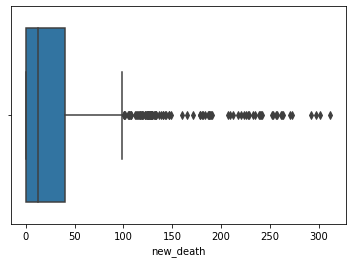

In [ ]:
sns.boxplot(x = dt_cases_allclean_pd['new_death'])

เห็นได้ว่ามีหนังสือบางเล่มที่ราคาสูงกว่าปกติไปเยอะมาก ลองมาดูกันว่าหนังสือ book_id อะไรบ้าง ที่ราคาเกิน $80

In [ ]:
dt_cases_allclean.where( dt_cases_allclean.new_death > 100 ).select("txn_date").distinct().show()

+-------------------+
|           txn_date|
+-------------------+
|2021-08-27 00:00:00|
|2022-04-30 00:00:00|
|2021-09-07 00:00:00|
|2022-04-14 00:00:00|
|2021-09-08 00:00:00|
|2021-09-23 00:00:00|
|2021-09-30 00:00:00|
|2022-04-24 00:00:00|
|2021-08-17 00:00:00|
|2021-09-29 00:00:00|
|2021-08-05 00:00:00|
|2021-08-23 00:00:00|
|2021-08-18 00:00:00|
|2021-08-25 00:00:00|
|2021-09-27 00:00:00|
|2022-04-11 00:00:00|
|2021-09-02 00:00:00|
|2021-09-16 00:00:00|
|2021-07-18 00:00:00|
|2021-08-16 00:00:00|
+-------------------+
only showing top 20 rows



---

![](https://file.designil.com/TmpQfK+)

# Step 4) Data Cleansing with Spark line_list file

มาทำความสะอาดข้อมูลด้วย Spark กันเถอะ

### แปลง Data Type

ปัญหาที่เจอบ่อยที่สุดแบบหนึ่งในข้อมูล คือ **Data Type ไม่ตรงกับที่เราต้องการ**

In [ ]:
# Show top 5 rows
dt_line_list.show(5)

+----------+------+----------+---------+-----------+----+-----+------------+---------+-------------------+----------+
|  txn_date|gender|age_number|age_range|nationality| job| risk|patient_type| province|        update_date|new_gender|
+----------+------+----------+---------+-----------+----+-----+------------+---------+-------------------+----------+
|2022-08-31|   ชาย|        42| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|   ชลบุรี|2022-08-31 07:26:44|      Male|
|2022-08-31|  หญิง|        57| 50-59 ปี|       null|null|อื่นๆ|    10.อื่นๆ|อุทัยธานี|2022-08-31 07:26:44|    Female|
|2022-08-31|  หญิง|        76| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|กาฬสินธุ์|2022-08-31 07:26:44|    Female|
|2022-08-31|  หญิง|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|   สกลนคร|2022-08-31 07:26:44|    Female|
|2022-08-31|   ชาย|        73| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ| สุรินทร์|2022-08-31 07:26:44|      Male|
+----------+------+----------+---------+-----------+----

In [ ]:
# Show Schema
dt_line_list.printSchema()

root
 |-- txn_date: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- age_number: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- job: string (nullable = true)
 |-- risk: string (nullable = true)
 |-- patient_type: string (nullable = true)
 |-- province: string (nullable = true)
 |-- update_date: string (nullable = true)
 |-- new_gender: string (nullable = false)



จะเห็นว่า `Timestamp` ถูกอ่านเป็นข้อมูลตัวหนังสือ (String) แต่เราอยากให้มันเป็นข้อมูลวันที่และเวลา (date time) จะทำยังไงดี?

ก่อนอื่น เราต้องมาดูก่อนว่าคอลัมน์ Timestamp แสดงเลขวันที่ก่อน หรือเลขเดือนก่อน (DD/MM/YYYY หรือ MM/DD/YYYY)

In [ ]:
dt_line_list.select(["txn_date","update_date"]).show(10)

+----------+-------------------+
|  txn_date|        update_date|
+----------+-------------------+
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
|2022-08-31|2022-08-31 07:26:44|
+----------+-------------------+
only showing top 10 rows



เราจะมาใช้ฟังก์ชั่น to_timestamp ซึ่งอยู่ใน pyspark.sql.functions กัน

Reference: https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.to_timestamp.html

In [ ]:
# แปลง string เป็น datetime
from pyspark.sql import functions as f
# withcolumn เป็นการสร้างคอลัมน์ใหม่ชื่อ timestamp
dt_line_listclean = dt_line_list.withColumn("txn_date",
                        f.to_timestamp(dt_line_list.txn_date, 'yyyy-MM-dd'))\
                        .withColumn("update_date",
                        f.to_timestamp(dt_line_list.update_date, 'yyyy-MM-dd HH:mm:ss')
                        ) 

dt_line_listclean.show()

+-------------------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+----------+
|           txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|     province|        update_date|new_gender|
+-------------------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+----------+
|2022-08-31 00:00:00|   ชาย|        42| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|      Male|
|2022-08-31 00:00:00|  หญิง|        57| 50-59 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|    Female|
|2022-08-31 00:00:00|  หญิง|        76| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|    Female|
|2022-08-31 00:00:00|  หญิง|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|    Female|
|2022-08-31 00:00:00|   ชาย|        73| >= 70 ปี|       null|null|อื่นๆ|    10.อื่น

In [ ]:
dt_line_listclean.printSchema()

root
 |-- txn_date: timestamp (nullable = true)
 |-- gender: string (nullable = true)
 |-- age_number: integer (nullable = true)
 |-- age_range: string (nullable = true)
 |-- nationality: string (nullable = true)
 |-- job: string (nullable = true)
 |-- risk: string (nullable = true)
 |-- patient_type: string (nullable = true)
 |-- province: string (nullable = true)
 |-- update_date: timestamp (nullable = true)
 |-- new_gender: string (nullable = false)



## BONUS: ตัวอย่างการใช้ประโยชน์จากข้อมูล Datetime

In [ ]:
# ดูข้อมูลผู้ติดเชื้อวันที่ 2 ของเดือนกันยายนปี 2022
dt_line_listclean.where( (f.dayofmonth(dt_line_listclean.txn_date) == 2)\
                        & ( f.month(dt_line_listclean.txn_date) == 9 )\
                        & ( f.year(dt_line_listclean.txn_date) == 2022 ) ).show()

+-------------------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+----------+
|           txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|     province|        update_date|new_gender|
+-------------------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+----------+
|2022-09-02 00:00:00|  หญิง|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|กรุงเทพมหานคร|2022-09-02 07:25:47|    Female|
|2022-09-02 00:00:00|  หญิง|        35| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|     ปทุมธานี|2022-09-02 07:25:47|    Female|
|2022-09-02 00:00:00|  หญิง|        88| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|         ตรัง|2022-09-02 07:25:47|    Female|
|2022-09-02 00:00:00|  หญิง|        33| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|   ฉะเชิงเทรา|2022-09-02 07:25:47|    Female|
|2022-09-02 00:00:00|  หญิง|        61| 60-69 ปี|       null|null|อื่นๆ|    10.อื่น

In [ ]:
dt_line_listclean.where( (f.dayofmonth(dt_line_listclean.txn_date) ==2)\
                        & ( f.month(dt_line_listclean.txn_date) == 9 )\
                        & ( f.year(dt_line_listclean.txn_date) == 2022 ) ).count()

2046

## Anomalies Check

ใช้ Spark ตามหาสิ่งที่ผิดปกติในข้อมูล

### ความผิดปกติ 1) Syntactical Anomalies
**Lexical errors** เช่น สะกดผิด

#### Exercise 4

หาชื่อประเทศที่สะกดผิด แล้วแก้ชื่อที่สะกดผิดให้ถูก

In [ ]:
# ใน Data set ชุดนี้ มีข้อมูลจากกี่จังหวัด
dt_line_listclean.select("province").distinct().count()

70

In [ ]:
# แทนที่ ... ด้วยจำนวนประเทศ เพื่อดูรายชื่อประเทศทั้งหมด
# sort = ทำให้ข้อมูลเรียงตามตัวอักษร อ่านง่ายขึ้น
# show() ถ้าไม่ใส่ตัวเลขจะขึ้นมาแค่ 20 อัน และใส่ False เพื่อให้แสดงข้อมูลในคอลัมน์แบบเต็ม ๆ (หากไม่ใส่ คอลัมน์ที่ยาวจะถูกตัดตัวหนังสือ)
dt_line_listclean.select("province").distinct().sort("province").show( 70, False )

+---------------+
|province       |
+---------------+
|กระบี่         |
|กรุงเทพมหานคร  |
|กาญจนบุรี      |
|กาฬสินธุ์      |
|ขอนแก่น        |
|จันทบุรี       |
|ฉะเชิงเทรา     |
|ชลบุรี         |
|ชัยภูมิ        |
|ชุมพร          |
|ตรัง           |
|ตราด           |
|ตาก            |
|นครนายก        |
|นครปฐม         |
|นครพนม         |
|นครราชสีมา     |
|นครศรีธรรมราช  |
|นครสวรรค์      |
|นนทบุรี        |
|นราธิวาส       |
|น่าน           |
|บุรีรัมย์      |
|ปทุมธานี       |
|ประจวบคีรีขันธ์|
|ปราจีนบุรี     |
|พระนครศรีอยุธยา|
|พะเยา          |
|พัทลุง         |
|พิษณุโลก       |
|ภูเก็ต         |
|มหาสารคาม      |
|มุกดาหาร       |
|ยะลา           |
|ยโสธร          |
|ระนอง          |
|ระยอง          |
|ราชบุรี        |
|ร้อยเอ็ด       |
|ลพบุรี         |
|ลำปาง          |
|ลำพูน          |
|ศรีสะเกษ       |
|สกลนคร         |
|สงขลา          |
|สตูล           |
|สมุทรปราการ    |
|สมุทรสงคราม    |
|สมุทรสาคร      |
|สระบุรี        |
|สระแก้ว        |
|สิงห์บุรี      |
|สุพรรณบุร

ตรวจสอบด้วยสายตาพบว่าสะกดถูกทั้งหมด

In [ ]:
# ดูหน้าตาข้อมูลตอนนี้
dt_line_listclean.show()

+-------------------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+----------+
|           txn_date|gender|age_number|age_range|nationality| job| risk|patient_type|     province|        update_date|new_gender|
+-------------------+------+----------+---------+-----------+----+-----+------------+-------------+-------------------+----------+
|2022-08-31 00:00:00|   ชาย|        42| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|      Male|
|2022-08-31 00:00:00|  หญิง|        57| 50-59 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|    Female|
|2022-08-31 00:00:00|  หญิง|        76| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|    Female|
|2022-08-31 00:00:00|  หญิง|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|    Female|
|2022-08-31 00:00:00|   ชาย|        73| >= 70 ปี|       null|null|อื่นๆ|    10.อื่น

In [ ]:
# เอาคอลัมน์ CountryUpdate ไปแทนที่คอลัมน์ Country
dt_line_listclean = dt_line_listclean.drop("gender").withColumnRenamed('new_gender', 'gender')

In [ ]:
dt_line_listclean.select("gender").distinct().count()

3

In [ ]:
# ดูหน้าตาข้อมูล
dt_line_listclean.show()

+-------------------+----------+---------+-----------+----+-----+------------+-------------+-------------------+------+
|           txn_date|age_number|age_range|nationality| job| risk|patient_type|     province|        update_date|gender|
+-------------------+----------+---------+-----------+----+-----+------------+-------------+-------------------+------+
|2022-08-31 00:00:00|        42| 40-49 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|  Male|
|2022-08-31 00:00:00|        57| 50-59 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|Female|
|2022-08-31 00:00:00|        76| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|Female|
|2022-08-31 00:00:00|        39| 30-39 ปี|       null|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|Female|
|2022-08-31 00:00:00|        73| >= 70 ปี|       null|null|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|  Male|
|2022-08-31 00:00:00|        48| 40-49 ป

In [ ]:
dt_line_listclean.select("nationality").distinct().show()

+--------------------+
|         nationality|
+--------------------+
|                Thai|
|               Swiss|
|           Icelandic|
|              Indian|
|             Chinese|
|                null|
|        South Korean|
|            Japanese|
|            Filipino|
|   British / English|
|             Emirati|
|             Burmese|
|Kazakh / Kazakhstani|
|              French|
|               Dutch|
|           Cambodian|
|              German|
|             Swedish|
|            American|
|            Canadian|
+--------------------+



In [ ]:
from pyspark.sql.functions import when

dt_line_listclean = dt_line_listclean.withColumn("new_nationality", 
                                       when(dt_line_listclean['nationality'] == 'British / English', 'British')
                                       .when(dt_line_listclean['nationality']== 'Kazakh / Kazakhstani', 'Kazakh')
                                       .otherwise(dt_line_listclean['nationality']))



In [ ]:
dt_line_listclean.select(["nationality", "new_nationality"]).distinct().show()

+--------------------+---------------+
|         nationality|new_nationality|
+--------------------+---------------+
|   British / English|        British|
|           Cambodian|      Cambodian|
|                null|           null|
|             Chinese|        Chinese|
|            Canadian|       Canadian|
|              Indian|         Indian|
|Kazakh / Kazakhstani|         Kazakh|
|                Thai|           Thai|
|        South Korean|   South Korean|
|             Burmese|        Burmese|
|            Filipino|       Filipino|
|              French|         French|
|           Icelandic|      Icelandic|
|               Dutch|          Dutch|
|             Emirati|        Emirati|
|             Swedish|        Swedish|
|               Swiss|          Swiss|
|              German|         German|
|            American|       American|
|            Japanese|       Japanese|
+--------------------+---------------+



In [ ]:
# เอาคอลัมน์ new_nationality ไปแทนที่ nationality (โค้ดจาก Exercise 4)
dt_line_listclean = dt_line_listclean.drop("nationality").withColumnRenamed('new_nationality', 'nationality')

In [ ]:
dt_line_listclean.show()

+-------------------+----------+---------+----+-----+------------+-------------+-------------------+------+-----------+
|           txn_date|age_number|age_range| job| risk|patient_type|     province|        update_date|gender|nationality|
+-------------------+----------+---------+----+-----+------------+-------------+-------------------+------+-----------+
|2022-08-31 00:00:00|        42| 40-49 ปี|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|        57| 50-59 ปี|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        76| >= 70 ปี|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        39| 30-39 ปี|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        73| >= 70 ปี|null|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|        48| 40-49 ป

In [ ]:
# ดูหน้าตาคอลัมน์เชื้อชาติอีกรอบ
dt_line_listclean.select("nationality").distinct().count()

20

#### จบ Exercise 4

### ความผิดปกติ 2) Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- user_id: ค่าจะต้องเป็นตัวเลขหรือตัวหนังสือ 8 ตัวอักษร

In [ ]:
# ดูว่าข้อมูล user_id ตอนนี้หน้าตาเป็นอย่างไร
# dt_line_listclean.select("user_id").show(10)

In [ ]:
# นับจำนวน user_id ทั้งหมด
# dt_clean.select("user_id").count()

### ความผิดปกติ 3) Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

ค่า Missing Value คือ ค่าที่ว่างเปล่า

เราจะรู้ได้ยังไงว่าคอลัมน์ไหนมีค่าว่างเปล่ากี่ค่า

In [ ]:
# วิธีที่ 1 ในการเช็ค Missing Value
# ใช้เทคนิค List Comparehension - ทบทวนได้ใน Pre-course Python https://school.datath.com/courses/road-to-data-engineer-2/contents/6129b780564a8
# เช่น [ print(i) for i in [1,2,3] ]

# col = คำสั่ง Spark ในการเลือกคอลัมน์
# sum = คำสั่ง Spark ในการคิดผลรวม
from pyspark.sql.functions import col, sum

dt_nulllist = dt_line_listclean.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_line_listclean.columns ])
dt_nulllist.show()

+--------+----------+---------+----+----+------------+--------+-----------+------+-----------+
|txn_date|age_number|age_range| job|risk|patient_type|province|update_date|gender|nationality|
+--------+----------+---------+----+----+------------+--------+-----------+------+-----------+
|       0|       173|        0|4969|   0|           0|       0|          0|     0|       2906|
+--------+----------+---------+----+----+------------+--------+-----------+------+-----------+



In [ ]:
# วิธีที่ 2 ในการเช็ค Missing Value - จาก Exercise 1 โค้ดสะอาดกว่ามาก แต่ต้องมาบวกลบเอง
dt_line_listclean.summary("count").show()

+-------+----------+---------+---+----+------------+--------+------+-----------+
|summary|age_number|age_range|job|risk|patient_type|province|gender|nationality|
+-------+----------+---------+---+----+------------+--------+------+-----------+
|  count|      4796|     4969|  0|4969|        4969|    4969|  4969|       2063|
+-------+----------+---------+---+----+------------+--------+------+-----------+



In [ ]:
# ดูข้อมูลว่าแถวไหนมี age_number เป็นค่าว่างเปล่า (โค้ดเดียวกับ Exercise 1)

dt_line_listclean.where( dt_line_listclean.age_number.isNull() ).show()

+-------------------+----------+---------+----+-----+------------+---------------+-------------------+------+-----------+
|           txn_date|age_number|age_range| job| risk|patient_type|       province|        update_date|gender|nationality|
+-------------------+----------+---------+----+-----+------------+---------------+-------------------+------+-----------+
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|        สุโขทัย|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|ประจวบคีรีขันธ์|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|      สมุทรสาคร|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|      กาญจนบุรี|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|       สุรินทร์|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|   

In [ ]:
# ดูข้อมูลว่าแถวไหนมี job เป็นค่าว่างเปล่า (โค้ดเดียวกับ Exercise 1)

dt_line_listclean.where( dt_line_listclean.job.isNull() ).show()

+-------------------+----------+---------+----+-----+------------+-------------+-------------------+------+-----------+
|           txn_date|age_number|age_range| job| risk|patient_type|     province|        update_date|gender|nationality|
+-------------------+----------+---------+----+-----+------------+-------------+-------------------+------+-----------+
|2022-08-31 00:00:00|        42| 40-49 ปี|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|        57| 50-59 ปี|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        76| >= 70 ปี|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        39| 30-39 ปี|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        73| >= 70 ปี|null|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|        48| 40-49 ป

In [ ]:
# ดูข้อมูลว่าแถวไหนมี nationality เป็นค่าว่างเปล่า (โค้ดเดียวกับ Exercise 1)

dt_line_listclean.where( dt_line_listclean.nationality.isNull() ).show()

+-------------------+----------+---------+----+-----+------------+-------------+-------------------+------+-----------+
|           txn_date|age_number|age_range| job| risk|patient_type|     province|        update_date|gender|nationality|
+-------------------+----------+---------+----+-----+------------+-------------+-------------------+------+-----------+
|2022-08-31 00:00:00|        42| 40-49 ปี|null|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|        57| 50-59 ปี|null|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        76| >= 70 ปี|null|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        39| 30-39 ปี|null|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|Female|       null|
|2022-08-31 00:00:00|        73| >= 70 ปี|null|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|  Male|       null|
|2022-08-31 00:00:00|        48| 40-49 ป

#### Exercise 6:
ทางทีม Data Analyst แจ้งว่าอยากให้เราแทน age_number ที่เป็น NULL ด้วย 0 ไปเลย

In [ ]:
# แทนค่า age_number = 0
from pyspark.sql.functions import when
dt_line_listclean_age_number = dt_line_listclean.withColumn("age_number_update", 
                                       when(dt_line_listclean['age_number'].isNull(), '0').otherwise(dt_line_listclean['age_number'])
                                       )

In [ ]:
dt_line_listclean_age_number.where( dt_line_listclean_age_number.age_number.isNull() ).show()

+-------------------+----------+---------+----+-----+------------+---------------+-------------------+------+-----------+-----------------+
|           txn_date|age_number|age_range| job| risk|patient_type|       province|        update_date|gender|nationality|age_number_update|
+-------------------+----------+---------+----+-----+------------+---------------+-------------------+------+-----------+-----------------+
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|        สุโขทัย|2022-08-31 07:26:44|  Male|       null|                0|
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|ประจวบคีรีขันธ์|2022-08-31 07:26:44|Female|       null|                0|
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|      สมุทรสาคร|2022-08-31 07:26:44|Female|       null|                0|
|2022-08-31 00:00:00|      null|  ไม่ระบุ|null|อื่นๆ|    10.อื่นๆ|      กาญจนบุรี|2022-08-31 07:26:44|  Male|       null|                0|
|2022-08-31 00:00:00

In [ ]:
# drop column age_number
dt_line_listclean = dt_line_listclean_age_number.drop("age_number").withColumnRenamed('age_number_update', 'age_number')

In [ ]:
# เช็คว่า age number ที่เป็น NULL หายไปแล้วจริงมั้ย
dt_line_listclean.where( dt_line_listclean.age_number.isNull() ).show()

+--------+---------+---+----+------------+--------+-----------+------+-----------+----------+
|txn_date|age_range|job|risk|patient_type|province|update_date|gender|nationality|age_number|
+--------+---------+---+----+------------+--------+-----------+------+-----------+----------+
+--------+---------+---+----+------------+--------+-----------+------+-----------+----------+



ทางทีม Data Analyst แจ้งว่าอยากให้เราแทน drop job column ไปเล้ย

In [ ]:
dt_line_listclean = dt_line_listclean.drop('job')

In [ ]:
dt_line_listclean.show()

+-------------------+---------+-----+------------+-------------+-------------------+------+-----------+----------+
|           txn_date|age_range| risk|patient_type|     province|        update_date|gender|nationality|age_number|
+-------------------+---------+-----+------------+-------------+-------------------+------+-----------+----------+
|2022-08-31 00:00:00| 40-49 ปี|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|  Male|       null|        42|
|2022-08-31 00:00:00| 50-59 ปี|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|Female|       null|        57|
|2022-08-31 00:00:00| >= 70 ปี|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|Female|       null|        76|
|2022-08-31 00:00:00| 30-39 ปี|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|Female|       null|        39|
|2022-08-31 00:00:00| >= 70 ปี|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|  Male|       null|        73|
|2022-08-31 00:00:00| 40-49 ปี|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26

In [ ]:
# Check type ปรากฏว่า age_number ยังเป็น string อยู่
dt_line_listclean.printSchema()

root
 |-- txn_date: timestamp (nullable = true)
 |-- age_range: string (nullable = true)
 |-- risk: string (nullable = true)
 |-- patient_type: string (nullable = true)
 |-- province: string (nullable = true)
 |-- update_date: timestamp (nullable = true)
 |-- gender: string (nullable = false)
 |-- nationality: string (nullable = true)
 |-- age_number: string (nullable = true)



In [ ]:
# แปลง Type ของ age 
dt_line_listclean = dt_line_listclean.withColumn("age_number",col("age_number").cast("integer"))

In [ ]:
dt_line_listclean.printSchema()

root
 |-- txn_date: timestamp (nullable = true)
 |-- age_range: string (nullable = true)
 |-- risk: string (nullable = true)
 |-- patient_type: string (nullable = true)
 |-- province: string (nullable = true)
 |-- update_date: timestamp (nullable = true)
 |-- gender: string (nullable = false)
 |-- nationality: string (nullable = true)
 |-- age_number: integer (nullable = true)



มาคลีนคอลัมน์ Nationality กันต่อ จากที่เราเคยอ่านข้อมูลออกมาพบว่าเชื้อชาติของผู้ที่ติดเชื้อมีประมาณ 20 ชาติ 1 ในนั้นมีค่า null ด้วย ทีม DA อยากให้แก้ค่า null ให้กลายเป็น Unknown แทน

In [ ]:
# แทนค่า nationality ที่เป็น null = Unknown
from pyspark.sql.functions import when
dt_line_listclean_nationality = dt_line_listclean.withColumn("nationality_update", 
                                       when(dt_line_listclean['nationality'].isNull(), 'Unknown').otherwise(dt_line_listclean['nationality'])
                                       )

In [ ]:
dt_line_listclean_nationality.where( dt_line_listclean_nationality.nationality.isNull() ).show()

+-------------------+---------+-----+------------+-------------+-------------------+------+-----------+----------+------------------+
|           txn_date|age_range| risk|patient_type|     province|        update_date|gender|nationality|age_number|nationality_update|
+-------------------+---------+-----+------------+-------------+-------------------+------+-----------+----------+------------------+
|2022-08-31 00:00:00| 40-49 ปี|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|  Male|       null|        42|           Unknown|
|2022-08-31 00:00:00| 50-59 ปี|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|Female|       null|        57|           Unknown|
|2022-08-31 00:00:00| >= 70 ปี|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|Female|       null|        76|           Unknown|
|2022-08-31 00:00:00| 30-39 ปี|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|Female|       null|        39|           Unknown|
|2022-08-31 00:00:00| >= 70 ปี|อื่นๆ|    10.อื่นๆ|     สุรินทร

In [ ]:
# drop column nationality
dt_line_listclean = dt_line_listclean_nationality.drop("nationality").withColumnRenamed('nationality_update', 'nationality')

In [ ]:
# เช็คว่า nationality ที่เป็น NULL หายไปแล้วจริงมั้ย
dt_line_listclean.where( dt_line_listclean.age_number.isNull() ).show()

+--------+---------+----+------------+--------+-----------+------+----------+-----------+
|txn_date|age_range|risk|patient_type|province|update_date|gender|age_number|nationality|
+--------+---------+----+------------+--------+-----------+------+----------+-----------+
+--------+---------+----+------------+--------+-----------+------+----------+-----------+



In [ ]:
dt_line_listclean.show()

+-------------------+---------+-----+------------+-------------+-------------------+------+----------+-----------+
|           txn_date|age_range| risk|patient_type|     province|        update_date|gender|age_number|nationality|
+-------------------+---------+-----+------------+-------------+-------------------+------+----------+-----------+
|2022-08-31 00:00:00| 40-49 ปี|อื่นๆ|    10.อื่นๆ|       ชลบุรี|2022-08-31 07:26:44|  Male|        42|    Unknown|
|2022-08-31 00:00:00| 50-59 ปี|อื่นๆ|    10.อื่นๆ|    อุทัยธานี|2022-08-31 07:26:44|Female|        57|    Unknown|
|2022-08-31 00:00:00| >= 70 ปี|อื่นๆ|    10.อื่นๆ|    กาฬสินธุ์|2022-08-31 07:26:44|Female|        76|    Unknown|
|2022-08-31 00:00:00| 30-39 ปี|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26:44|Female|        39|    Unknown|
|2022-08-31 00:00:00| >= 70 ปี|อื่นๆ|    10.อื่นๆ|     สุรินทร์|2022-08-31 07:26:44|  Male|        73|    Unknown|
|2022-08-31 00:00:00| 40-49 ปี|อื่นๆ|    10.อื่นๆ|       สกลนคร|2022-08-31 07:26

In [ ]:
# Check null อีกรอบซิเพื่อความชัวร์
dt_line_listclean.summary("count").show()

+-------+---------+----+------------+--------+------+----------+-----------+
|summary|age_range|risk|patient_type|province|gender|age_number|nationality|
+-------+---------+----+------------+--------+------+----------+-----------+
|  count|     4969|4969|        4969|    4969|  4969|      4969|       4969|
+-------+---------+----+------------+--------+------+----------+-----------+



### ความผิดปกติ 4) Outliers:

ข้อมูลที่สูงหรือต่ำผิดปกติจากข้อมูลส่วนใหญ่

มาลองใช้ Boxplot ในการหาค่า Outlier ของอายุผู้ติดเชื้อ

In [ ]:
# check outlier of age
dt_line_listclean_pd = dt_line_listclean.toPandas()

In [ ]:
dt_line_listclean_pd.dtypes

txn_date        datetime64[ns]
age_range               object
risk                    object
patient_type            object
province                object
update_date     datetime64[ns]
gender                  object
age_number               int32
nationality             object
dtype: object

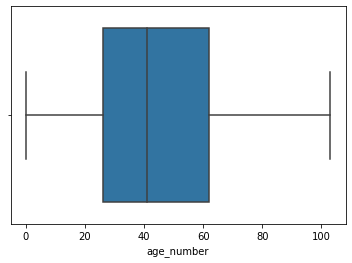

In [ ]:
sns.boxplot(x = dt_line_listclean_pd['age_number'])

---

![](https://file.designil.com/TmpQfK+)

# Step 4) Data Cleansing with Spark by_province

มาทำความสะอาดข้อมูลด้วย Spark กันเถอะ

### แปลง Data Type

ปัญหาที่เจอบ่อยที่สุดแบบหนึ่งในข้อมูล คือ **Data Type ไม่ตรงกับที่เราต้องการ**

In [ ]:
# Show top 5 rows
dt_by_provinces.show(5)

+----------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|  txn_date|     province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+----------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2020-01-12|       กระบี่|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|กรุงเทพมหานคร|       1|         1|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|    กาญจนบุรี|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|    กาฬสินธุ์|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12|    กำแพงเพชร|       0|      

In [ ]:
# Show Schema
dt_by_provinces.printSchema()

root
 |-- txn_date: string (nullable = true)
 |-- province: string (nullable = true)
 |-- new_case: integer (nullable = true)
 |-- total_case: integer (nullable = true)
 |-- new_case_excludeabroad: integer (nullable = true)
 |-- total_case_excludeabroad: integer (nullable = true)
 |-- new_death: integer (nullable = true)
 |-- total_death: integer (nullable = true)
 |-- update_date: string (nullable = true)



จะเห็นว่า `Timestamp` ถูกอ่านเป็นข้อมูลตัวหนังสือ (String) แต่เราอยากให้มันเป็นข้อมูลวันที่และเวลา (date time) จะทำยังไงดี?

ก่อนอื่น เราต้องมาดูก่อนว่าคอลัมน์ Timestamp แสดงเลขวันที่ก่อน หรือเลขเดือนก่อน (DD/MM/YYYY หรือ MM/DD/YYYY)

In [ ]:
dt_by_provinces.select(["txn_date","update_date"]).show(10)

+----------+-------------------+
|  txn_date|        update_date|
+----------+-------------------+
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
|2020-01-12|2022-06-30 07:26:58|
+----------+-------------------+
only showing top 10 rows



เราจะมาใช้ฟังก์ชั่น to_timestamp ซึ่งอยู่ใน pyspark.sql.functions กัน

Reference: https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.functions.to_timestamp.html

In [ ]:
# แปลง string เป็น datetime
from pyspark.sql import functions as f
# withcolumn เป็นการสร้างคอลัมน์ใหม่ชื่อ timestamp
dt_by_provincesclean = dt_by_provinces.withColumn("txn_date",
                        f.to_timestamp(dt_by_provinces.txn_date, 'yyyy-MM-dd'))\
                        .withColumn("update_date",
                        f.to_timestamp(dt_by_provinces.update_date, 'yyyy-MM-dd HH:mm:ss')
                        )

dt_by_provincesclean.show()

+-------------------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|           txn_date|     province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+-------------------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2020-01-12 00:00:00|       กระบี่|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12 00:00:00|กรุงเทพมหานคร|       1|         1|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12 00:00:00|    กาญจนบุรี|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-12 00:00:00|    กาฬสินธุ์|       0|         0|                     0|                       0|        0|          0

In [ ]:
dt_by_provincesclean.printSchema()

root
 |-- txn_date: timestamp (nullable = true)
 |-- province: string (nullable = true)
 |-- new_case: integer (nullable = true)
 |-- total_case: integer (nullable = true)
 |-- new_case_excludeabroad: integer (nullable = true)
 |-- total_case_excludeabroad: integer (nullable = true)
 |-- new_death: integer (nullable = true)
 |-- total_death: integer (nullable = true)
 |-- update_date: timestamp (nullable = true)



## BONUS: ตัวอย่างการใช้ประโยชน์จากข้อมูล Datetime

In [ ]:
# ดูข้อมูลผู้ติดเชื้อช่วงครึ่งเดือนแรก ของเดือนสิงหาคมปี 2022
dt_by_provincesclean.where( (f.dayofmonth(dt_by_provincesclean.txn_date) <= 15)\
                        & ( f.month(dt_by_provincesclean.txn_date) == 8 )\
                        & ( f.year(dt_by_provincesclean.txn_date) == 2022 ) ).show()

+-------------------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|           txn_date|     province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+-------------------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2022-08-01 00:00:00|       กระบี่|       1|     25027|                     1|                   24710|        0|        155|2022-08-01 07:25:07|
|2022-08-01 00:00:00|กรุงเทพมหานคร|    1566|    923857|                  1566|                  919485|        5|       8076|2022-08-01 07:25:07|
|2022-08-01 00:00:00|    กาญจนบุรี|       0|     52113|                     0|                   52060|        0|        350|2022-08-01 07:25:07|
|2022-08-01 00:00:00|    กาฬสินธุ์|       7|     34755|                     7|                   34751|        0|        226

## Anomalies Check

ใช้ Spark ตามหาสิ่งที่ผิดปกติในข้อมูล

### ความผิดปกติ 1) Syntactical Anomalies
**Lexical errors** เช่น สะกดผิด

#### Exercise 4

หาชื่อประเทศที่สะกดผิด แล้วแก้ชื่อที่สะกดผิดให้ถูก

In [ ]:
# ใน Data set ชุดนี้ มีข้อมูลจากกี่จังหวัด
dt_by_provincesclean.select("province").distinct().count()

78

In [ ]:
# แทนที่ ... ด้วยจำนวนประเทศ เพื่อดูรายชื่อประเทศทั้งหมด
# sort = ทำให้ข้อมูลเรียงตามตัวอักษร อ่านง่ายขึ้น
# show() ถ้าไม่ใส่ตัวเลขจะขึ้นมาแค่ 20 อัน และใส่ False เพื่อให้แสดงข้อมูลในคอลัมน์แบบเต็ม ๆ (หากไม่ใส่ คอลัมน์ที่ยาวจะถูกตัดตัวหนังสือ)
dt_by_provincesclean.select("province").distinct().sort("province").show(78, False )

+---------------+
|province       |
+---------------+
|กระบี่         |
|กรุงเทพมหานคร  |
|กาญจนบุรี      |
|กาฬสินธุ์      |
|กำแพงเพชร      |
|ขอนแก่น        |
|จันทบุรี       |
|ฉะเชิงเทรา     |
|ชลบุรี         |
|ชัยนาท         |
|ชัยภูมิ        |
|ชุมพร          |
|ตรัง           |
|ตราด           |
|ตาก            |
|นครนายก        |
|นครปฐม         |
|นครพนม         |
|นครราชสีมา     |
|นครศรีธรรมราช  |
|นครสวรรค์      |
|นนทบุรี        |
|นราธิวาส       |
|น่าน           |
|บึงกาฬ         |
|บุรีรัมย์      |
|ปทุมธานี       |
|ประจวบคีรีขันธ์|
|ปราจีนบุรี     |
|ปัตตานี        |
|พระนครศรีอยุธยา|
|พะเยา          |
|พังงา          |
|พัทลุง         |
|พิจิตร         |
|พิษณุโลก       |
|ภูเก็ต         |
|มหาสารคาม      |
|มุกดาหาร       |
|ยะลา           |
|ยโสธร          |
|ระนอง          |
|ระยอง          |
|ราชบุรี        |
|ร้อยเอ็ด       |
|ลพบุรี         |
|ลำปาง          |
|ลำพูน          |
|ศรีสะเกษ       |
|สกลนคร         |
|สงขลา          |
|สตูล           |
|สมุทรปราก

มาดูกันว่าประเทศที่ชื่อผิด มีข้อมูลหน้าตาเป็นอย่างไร

In [ ]:
# เปลี่ยน ... เป็นชื่อประเทศที่คุณคิดว่าผิด
dt_by_provincesclean.where(dt_by_provincesclean['province'] == 'ไม่ระบุ').show()

+-------------------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|           txn_date|province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|
+-------------------+--------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+
|2020-01-12 00:00:00| ไม่ระบุ|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|
|2020-01-13 00:00:00| ไม่ระบุ|       0|         0|                     0|                       0|        0|          0|2022-06-29 18:09:36|
|2020-01-14 00:00:00| ไม่ระบุ|       0|         0|                     0|                       0|        0|          0|2022-06-29 18:09:36|
|2020-01-15 00:00:00| ไม่ระบุ|       0|         0|                     0|                       0|        0|          0|2022-06-29 18:09:36|
|2020-01-16 0

ได้เวลาลองเปลี่ยนชื่อประเทศให้สะกดถูกต้อง

In [ ]:
# เปลี่ยน ... เป็นชื่อประเทศที่คุณคิดว่าผิด และ ...2 เป็นชื่อประเทศที่ถูกต้อง
from pyspark.sql.functions import when

dt_by_provincesclean_province = dt_by_provincesclean.withColumn("provinceUpdate", 
                                       when(dt_by_provincesclean['province'] == 'ไม่ระบุ', 'Unknown').otherwise(dt_by_provincesclean['province'])
                                       )

In [ ]:
# ตรวจสอบข้อมูลที่แก้ไขแล้ว
dt_by_provincesclean_province.select("provinceUpdate").distinct().sort("provinceUpdate").show(78, False)

+---------------+
|provinceUpdate |
+---------------+
|Unknown        |
|กระบี่         |
|กรุงเทพมหานคร  |
|กาญจนบุรี      |
|กาฬสินธุ์      |
|กำแพงเพชร      |
|ขอนแก่น        |
|จันทบุรี       |
|ฉะเชิงเทรา     |
|ชลบุรี         |
|ชัยนาท         |
|ชัยภูมิ        |
|ชุมพร          |
|ตรัง           |
|ตราด           |
|ตาก            |
|นครนายก        |
|นครปฐม         |
|นครพนม         |
|นครราชสีมา     |
|นครศรีธรรมราช  |
|นครสวรรค์      |
|นนทบุรี        |
|นราธิวาส       |
|น่าน           |
|บึงกาฬ         |
|บุรีรัมย์      |
|ปทุมธานี       |
|ประจวบคีรีขันธ์|
|ปราจีนบุรี     |
|ปัตตานี        |
|พระนครศรีอยุธยา|
|พะเยา          |
|พังงา          |
|พัทลุง         |
|พิจิตร         |
|พิษณุโลก       |
|ภูเก็ต         |
|มหาสารคาม      |
|มุกดาหาร       |
|ยะลา           |
|ยโสธร          |
|ระนอง          |
|ระยอง          |
|ราชบุรี        |
|ร้อยเอ็ด       |
|ลพบุรี         |
|ลำปาง          |
|ลำพูน          |
|ศรีสะเกษ       |
|สกลนคร         |
|สงขลา          |
|สตูล     

In [ ]:
# ดูหน้าตาข้อมูลตอนนี้
dt_by_provincesclean_province.show()

+-------------------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+--------------+
|           txn_date|     province|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|provinceUpdate|
+-------------------+-------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+--------------+
|2020-01-12 00:00:00|       กระบี่|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|        กระบี่|
|2020-01-12 00:00:00|กรุงเทพมหานคร|       1|         1|                     0|                       0|        0|          0|2022-06-30 07:26:58| กรุงเทพมหานคร|
|2020-01-12 00:00:00|    กาญจนบุรี|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|     กาญจนบุรี|
|2020-01-12 00:00:00|    กาฬสินธุ์

In [ ]:
# เอาคอลัมน์ CountryUpdate ไปแทนที่คอลัมน์ Country
dt_by_provincesclean = dt_by_provincesclean_province.drop("province").withColumnRenamed('provinceUpdate', 'province')

In [ ]:
dt_by_provincesclean.select("province").distinct().count()

78

In [ ]:
# ดูหน้าตาข้อมูล
dt_by_provincesclean.show()

+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+-------------+
|           txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|     province|
+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+-------------+
|2020-01-12 00:00:00|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|       กระบี่|
|2020-01-12 00:00:00|       1|         1|                     0|                       0|        0|          0|2022-06-30 07:26:58|กรุงเทพมหานคร|
|2020-01-12 00:00:00|       0|         0|                     0|                       0|        0|          0|2022-06-30 07:26:58|    กาญจนบุรี|
|2020-01-12 00:00:00|       0|         0|                     0|                       0|        0|          0|2022-06-30 07

#### จบ Exercise 4

### ความผิดปกติ 2) Semantic Anomalies

**Integrity constraints**: ค่าอยู่นอกเหนือขอบเขตของค่าที่รับได้ เช่น
- user_id: ค่าจะต้องเป็นตัวเลขหรือตัวหนังสือ 8 ตัวอักษร

### ความผิดปกติ 3) Missing values

การเช็คและแก้ไข Missing Values (หากจำเป็น)

ค่า Missing Value คือ ค่าที่ว่างเปล่า

เราจะรู้ได้ยังไงว่าคอลัมน์ไหนมีค่าว่างเปล่ากี่ค่า

In [ ]:
# วิธีที่ 1 ในการเช็ค Missing Value
# ใช้เทคนิค List Comparehension - ทบทวนได้ใน Pre-course Python https://school.datath.com/courses/road-to-data-engineer-2/contents/6129b780564a8
# เช่น [ print(i) for i in [1,2,3] ]

# col = คำสั่ง Spark ในการเลือกคอลัมน์
# sum = คำสั่ง Spark ในการคิดผลรวม
from pyspark.sql.functions import col, sum

dt_nulllist = dt_by_provincesclean.select([ sum(col(colname).isNull().cast("int")).alias(colname) for colname in dt_by_provincesclean.columns ])
dt_nulllist.show()

+--------+--------+----------+----------------------+------------------------+---------+-----------+-----------+--------+
|txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|update_date|province|
+--------+--------+----------+----------------------+------------------------+---------+-----------+-----------+--------+
|       0|       0|         0|                     0|                       0|        0|          0|          0|       0|
+--------+--------+----------+----------------------+------------------------+---------+-----------+-----------+--------+



In [ ]:
# วิธีที่ 2 ในการเช็ค Missing Value - จาก Exercise 1 โค้ดสะอาดกว่ามาก แต่ต้องมาบวกลบเอง
dt_by_provincesclean.summary("count").show()

+-------+--------+----------+----------------------+------------------------+---------+-----------+--------+
|summary|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|province|
+-------+--------+----------+----------------------+------------------------+---------+-----------+--------+
|  count|   75270|     75270|                 75270|                   75270|    75270|      75270|   75270|
+-------+--------+----------+----------------------+------------------------+---------+-----------+--------+



In [ ]:
dt_by_provincesclean.printSchema()

root
 |-- txn_date: timestamp (nullable = true)
 |-- new_case: integer (nullable = true)
 |-- total_case: integer (nullable = true)
 |-- new_case_excludeabroad: integer (nullable = true)
 |-- total_case_excludeabroad: integer (nullable = true)
 |-- new_death: integer (nullable = true)
 |-- total_death: integer (nullable = true)
 |-- update_date: timestamp (nullable = true)
 |-- province: string (nullable = true)



### ความผิดปกติ 4) Outliers:

ข้อมูลที่สูงหรือต่ำผิดปกติจากข้อมูลส่วนใหญ่

มาลองใช้ Boxplot ในการหาค่า Outlier ของราคาหนังสือ

In [ ]:
# Cell นี้จะรันค่อนข้างนาน เนื่องจากข้อมูลมีเยอะ
dt_by_provincesclean_pd = dt_by_provincesclean.toPandas()

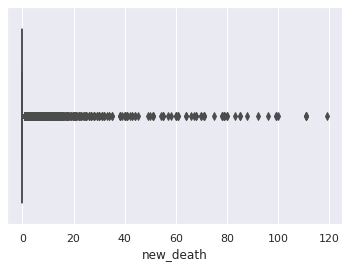

In [ ]:
sns.boxplot(x = dt_by_provincesclean_pd['new_death'])

เห็นได้ว่ามีค่าผู้เสียชีวิตที่สูงกว่า 100 คน เรามาลองตรวจสอบดูว่าสมเหตุสมผลหรือไม่

In [ ]:
dt_by_provincesclean.where( dt_by_provincesclean.new_death > 100 ).distinct().show()

+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+-------------+
|           txn_date|new_case|total_case|new_case_excludeabroad|total_case_excludeabroad|new_death|total_death|        update_date|     province|
+-------------------+--------+----------+----------------------+------------------------+---------+-----------+-------------------+-------------+
|2021-09-11 00:00:00|    3394|    347811|                  3392|                  346060|      111|       5536|2022-06-30 07:26:58|กรุงเทพมหานคร|
|2021-08-10 00:00:00|    4229|    216910|                  4226|                  215180|      111|       3210|2022-06-30 07:26:58|กรุงเทพมหานคร|
|2021-08-29 00:00:00|    3827|    299741|                  3827|                  298000|      111|       4756|2022-06-30 07:26:58|กรุงเทพมหานคร|
|2021-08-28 00:00:00|    4193|    295914|                  4193|                  294173|      119|       4645|2022-06-30 07

---

![](https://file.designil.com/TmpQfK+)

# Step 5) Save data เป็น CSV

โดยปกติแล้ว Spark จะทำการ Save ออกมาเป็นหลายไฟล์ เพราะใช้หลายเครื่องในการประมวลผล

In [ ]:
# เซฟเป็น partitioned files (ใช้ multiple workers)
dt_clean.write.csv('Cleaned_data.csv', header = True)

เราสามารถบังคับให้ Spark เซฟมาเป็นไฟล์เดียวได้

In [ ]:
# เซฟเป็น 1 ไฟล์ (ใช้ single worker) โดยคำสั่ง coalesce
# dt_cases_allclean.coalesce(1).write.csv('dt_cases_allclean_single.csv', header = True)
!cp -r "/content/dt_cases_allclean_single.csv" "/content/drive/MyDrive/DataEngineerProject"

In [ ]:
read_csv = spark.read.csv('/content/dt_cases_allclean_single.csv/part-00000-f8b34b78-c9b0-4f17-a997-d6823658cd48-c000.csv', header = True, inferSchema = True)
read_csv.count()

965

ยังไม่จบแค่นี้ เรามีแถมอีกเรื่อง...

### Bonus: วิธีอ่านไฟล์ที่มีหลาย Part
เช่น กรณีนี้ที่เรามี
- /content/Cleaned_Data.csv/part-00000-....csv
- /content/Cleaned_Data.csv/part-00001-....csv

In [ ]:
all_parts = spark.read.csv('/content/Cleaned_data.csv/part-*.csv', header = True, inferSchema = True)

In [ ]:
all_parts.count()

500000

In [ ]:
print('จบ Workshop 2 แล้วคร้าบ 😍')

จบ Workshop 2 แล้วคร้าบ 😍


# Step 5) Save data เป็น CSV line_list file

โดยปกติแล้ว Spark จะทำการ Save ออกมาเป็นหลายไฟล์ เพราะใช้หลายเครื่องในการประมวลผล

เราสามารถบังคับให้ Spark เซฟมาเป็นไฟล์เดียวได้

In [ ]:
# เซฟเป็น 1 ไฟล์ (ใช้ single worker) โดยคำสั่ง coalesce
dt_line_listclean.coalesce(1).write.csv('dt_line_listclean_single2.csv', header = True)
!cp -r "/content/dt_line_listclean_single2.csv" "/content/drive/MyDrive/DataEngineerProject"

In [ ]:
read_csv_test = spark.read.csv('/content/drive/MyDrive/DataEngineerProject/dt_line_listclean_single2.csv'\
                          , header = True, inferSchema = True)
read_csv_test.count()

4969

# Step 5) Save data เป็น CSV by province

โดยปกติแล้ว Spark จะทำการ Save ออกมาเป็นหลายไฟล์ เพราะใช้หลายเครื่องในการประมวลผล

เราสามารถบังคับให้ Spark เซฟมาเป็นไฟล์เดียวได้

In [ ]:
# เซฟเป็น 1 ไฟล์ (ใช้ single worker) โดยคำสั่ง coalesce
# dt_by_provincesclean.coalesce(1).write.csv('dt_by_provincesclean_single.csv', header = True)
!cp -r "/content/dt_by_provincesclean_single.csv" "/content/drive/MyDrive/DataEngineerProject"

In [ ]:
read_csv_test2 = spark.read.csv('/content/drive/MyDrive/DataEngineerProject/dt_by_provincesclean_single.csv/part-00000-c82a19ca-2288-4dbf-8893-5ac770ba32bd-c000.csv'\
                          , header = True, inferSchema = True)
read_csv_test2.count()

75270